# **Supermarket Customer Data Analysis**

## **Project Title: RFM Analysis and Marketing Campaign Strategy Optimization**

by : Grace Natalie Catherine

Data Source: [Data Source](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign)

In [521]:
# import libraries untuk data cleaning, manipulation and exploratory data analysis
import pandas as pd
import numpy as np

# import libraries untuk data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

# import libraries untuk uji statistik
from scipy.stats import shapiro # Uji Normalitas
from scipy.stats import mannwhitneyu, kruskal  # Non Parametrik
from scipy.stats import chi2_contingency # Uji Chi-Square

# fungsi untuk menampilkan semua kolom DataFrame saat membaca datasetnya di output
pd.set_option('display.max_columns', None)

# fungsi untuk ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **1. Business Understanding**


Perusahaan merupakan retailer multichannel yang menjual berbagai produk retail melalui website, katalog, dan toko offline. Pendapatan perusahaan sangat bergantung pada perilaku pembelian dan loyalitas pelanggan di berbagai channel tersebut. Pendapatan perusahaan berasal dari transaksi yang dilakukan oleh pelanggan. 

Data pelanggan yang tersedia mencakup profil demografis (usia, pendidikan, status pernikahan, pendapatan, komposisi keluarga), perilaku pelanggan (lama menjadi member, recency pembelian), serta riwayat komplain pelanggan. Meskipun data pelanggan tersedia, data tersebut belum dimanfaatkan secara optimal untuk segmentasi pelanggan dan penyusunan strategi pemasaran dan strategi retensi pelanggan yang lebih tepat sasaran.

Data ini memberikan peluang bagi perusahaan untuk melakukan analisis berbasis data guna mengidentifikasi pola perilaku pelanggan, menentukan segmen pelanggan yang bernilai, dan mengevaluasi faktor-faktor yang memengaruhi loyalitas pelanggan. Dengan basis pelanggan yang besar dan beragam, perusahaan memiliki tantangan dalam **memahami karakteristik pelanggan, mengoptimalkan strategi pemasaran, serta meningkatkan retensi dan nilai pelanggan**.

## **Problem Statement**

Dalam menjalankan bisnis retail supermarket multichannel, perusahaan menghadapi permasalahan berupa **belum adanya pemahaman yang menyeluruh terhadap perilaku pelanggan dengan pola pembelian yang beragam** di berbagai channel dan **rendahnya efektivitas kampanye (respons penerimaan rendah) dan customer engagement rendah (recency tinggi, diatas 30 hari)** akibat strategi pemasaran yang masih bersifat mass campaign, hal-hal ini berpotensi menurunkan engagement pelanggan dan meningkatkan risiko churn. 

Sebagai Data Analyst, pertanyaan yang akan dijawab pada analisis ini:
- Bagaimana perusahaan dapat **memahami pola perilaku pembelian pelanggan berdasarkan profil pelanggan**, **menargetkan kampanye pemasaran secara tepat sesuai segmen**, dan **menyesuaikan strategi perlakuan untuk meningkatkan customer engagement** untuk dapat meningkatkan revenue perusahaan?

## **Output (Goals)** 

- Memahami **pola perilaku pembelian pelanggan berdasarkan profil pelanggan** untuk dapat **mengidentifikasi karakteristik high-frequency buyers dan high spenders** sebagai landasan **strategi akuisisi pelanggan baru**.
- **Mengevaluasi efektivitas kampanye pemasaran** untuk **meningkatkan tingkat respons penerimaan campaign dan efektivitas kampanye pemasaran**.
- **Mensegmentasi pelanggan lama berdasarkan analisis RFM** agar dapat **menyesuaikan strategi customer engagement untuk retensi dan menargetkan campaign yang tepat**.
- **Menyusun rekomendasi strategi bisnis berbasis data** untuk **memaksimalkan efektivitas kampanye pemasaran** dan **meningkatkan customer engagement untuk retensi**.

# **2. Data Understanding**

Sebelum masuk ke dalam analisis, sangat perlu mengenal dataset terlebih dahulu dalam tahapan *data understanding*. Dari proses ini, akan mencari tahu anomali-anomali dalam dataset yang nantinya akan ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan penjelasan mengenai langkah *data cleaning* yang diambil.

## **Meta Data** :

### 1. People (Data Profil Pelanggan)

- ID: Customer's unique identifier (Identifikasi unik pelanggan)
- Year_Birth: Customer's birth year (Tahun kelahiran pelanggan)
- Education: Customer's education level (Tingkat pendidikan pelanggan)
- Marital_Status: Customer's marital status (Status pernikahan pelanggan)
- Income: Customer's yearly household income (Pendapatan rumah tangga tahunan pelanggan)
- Kidhome: Number of children in customer's household (Jumlah anak kecil dalam rumah tangga pelanggan)
- Teenhome: Number of teenagers in customer's household (Jumlah remaja dalam rumah tangga pelanggan)
- Dt_Customer: Date of customer's enrollment with the company (Tanggal pelanggan mulai bergabung dengan perusahaan)
- Recency: Number of days since customer's last purchase (Jumlah hari sejak pembelian terakhir pelanggan)
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise (1 jika pelanggan mengajukan keluhan dalam 2 tahun terakhir, 0 jika tidak)

### 2. Products (Pengeluaran Pelanggan pada Tiap Produk)
- MntWines: Amount spent on wine in last 2 years (Jumlah pengeluaran untuk produk wine dalam 2 tahun terakhir)
- MntFruits: Amount spent on fruits in last 2 years (Jumlah pengeluaran untuk produk buah dalam 2 tahun terakhir)
- MntMeatProducts: Amount spent on meat in last 2 years (Jumlah pengeluaran untuk produk daging dalam 2 tahun terakhir)
- MntFishProducts: Amount spent on fish in last 2 years (Jumlah pengeluaran untuk produk ikan dalam 2 tahun terakhir)
- MntSweetProducts: Amount spent on sweets in last 2 years (Jumlah pengeluaran untuk produk manisan dalam 2 tahun terakhir)
- MntGoldProds: Amount spent on gold in last 2 years (Jumlah pengeluaran untuk produk emas dalam 2 tahun terakhir)

### 3. Promotions (Data Promosi & Campaign)
- NumDealsPurchases: Number of purchases made with a discount (Jumlah pembelian yang dilakukan dengan diskon)
- AcceptedCmp1: 1 if customer accepted offer in 1st campaign, 0 otherwise (1 jika pelanggan menerima penawaran pada kampanye pertama, 0 jika tidak)
- AcceptedCmp2: 1 if customer accepted offer in 2nd campaign, 0 otherwise (1 jika pelanggan menerima penawaran pada kampanye kedua, 0 jika tidak)
- AcceptedCmp3: 1 if customer accepted offer in 3rd campaign, 0 otherwise (1 jika pelanggan menerima penawaran pada kampanye ketiga, 0 jika tidak)
- AcceptedCmp4: 1 if customer accepted offer in 4th campaign, 0 otherwise (1 jika pelanggan menerima penawaran pada kampanye keempat, 0 jika tidak)
- AcceptedCmp5: 1 if customer accepted offer in 5th campaign, 0 otherwise (1 jika pelanggan menerima penawaran pada kampanye kelima, 0 jika tidak)
- Response: 1 if customer accepted offer in last campaign, 0 otherwise (1 jika pelanggan menerima penawaran pada kampanye terakhir, 0 jika tidak)

### 4. Place (Data Channel Penjualan & Kunjungan Web)
- NumWebPurchases: Number of purchases made through company's website (Jumlah pembelian yang dilakukan melalui situs web perusahaan)
- NumCatalogPurchases: Number of purchases made using catalog (Jumlah pembelian yang dilakukan menggunakan katalog)
- NumStorePurchases: Number of purchases made directly in stores (Jumlah pembelian yang dilakukan langsung di toko)
- NumWebVisitsMonth: Number of visits to company's website in last month (Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir)

In [522]:
# read dataset 

df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')

display(df.head()) # 5 kolom teratas
display(df.tail()) # 5 kolom terbawah

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [523]:
# cek informasi dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [524]:
# cek missing values/null values dalam dataset

df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [525]:
# menghitung persentasi missing values/null values di tiap kolom dalam dataset

(df.isna().sum() / len(df)).round(4) * 100

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64

Dari ketiga observasi di atas:

- Terdapat total 27 kolom dan 2,240 baris data dalam dataset
- Pada kolom `Income` terdapat kurang dari 2240 non-null values yaitu sebanyak 2216 non-null values
- Pada pengecekan null/missing values, terdapat **24 null values** pada kolom `Income` dengan persentase missing values sebesar **1,07%**.
- `ID` adalah nomor unik customer.
- `Dt_Customer` adalah tanggal pelanggan bergabung membership perusahaan.

In [526]:
# cek jumlah baris yang duplikat

print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

Jumlah baris duplikat: 0


Dari hasil pengecekan duplicate values, tidak ada data yg duplikat.

### *Pengecekan variabel categorical/kualitatif*

In [527]:
# Kolom categorical profil customer
categorical_columns = ['Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                      'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']

# Loop untuk menampilkan unique values dan value counts
for col in categorical_columns:
    print(f"Column: {col}")
    print("\nUnique Values:")
    print(df[col].unique())
    print("\nValue Counts:")
    print(df[col].value_counts())
    print(f"Persentase(dalam %):\n{df[col].value_counts(normalize=True).round(5) * 100}")
    print(f"\n{'-'*20}")

Column: Education

Unique Values:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Value Counts:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Persentase(dalam %):
Education
Graduation    50.313
PhD           21.696
Master        16.518
2n Cycle       9.062
Basic          2.411
Name: proportion, dtype: float64

--------------------
Column: Marital_Status

Unique Values:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Value Counts:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Persentase(dalam %):
Marital_Status
Married     38.571
Together    25.893
Single      21.429
Divorced    10.357
Widow        3.438
Alone        0.134
Absurd       0.089
YOLO         0.089
Name: proportion, dtype: float64

--------------------
Column: AcceptedCmp1

Unique Values:
[0

Dari observasi data categorical di atas:

- Pada variabel `Education` terdapat 5 unique values(5 kategori), diantaranya : 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'.
- Setelah searching di internet, '2n cycle' dan 'Master' adalah 2 jenjang pendidikan yg sama sehingga bisa dijadikan 1 kategori "Master".
- Pada variabel `Education` terdapat kategori 'Basic' tidak jelas artinya sehingga akan dimasukkan ke dalam kategori baru yaitu Others.
- Kategori pada variabel `Education` terbanyak adalah 'Graduation'.
- Kategori 'Graduation' ambigu artinya sehingga akan diubah menjadi kategori tingkat pendidikan di bawah Master dan PhD yaitu 'Bachelor/Diploma'.
- Pada variabel `Marital_Status`, terdapat 8 unique values(8 kategori), diantaranya: Married (Menikah), Together (Pasangan Tinggal Bersama), Single (Belum Menikah), Divorced (Bercerai), Widow (Janda/Duda), Alone, Absurd, YOLO. 
- Kategori pada variabel `Marital_Status` terbanyak adalah 'Married'.
- Kategori 'Alone' sama dengan kategori 'Single', sehingga akan dijadikan 1 kategori. 
- Sementara kategori 'Absurd' dan 'YOLO' tidak jelas artinya sehingga akan dimasukkan ke dalam kategori baru yaitu 'Others'.
- Persentase customer yg complain dalam 2 tahun terakhir adalah 0,938%, sebanyak 21 complain. Secara persentase tidak banyak customer yang melakukan complain.
- Nama kolom `Response` ambigu, maka akan diubah nama kolomnya menjadi AcceptedCmp6 sehingga bisa selaras dengan kolom AcceptCmp1-5.
- Jumlah customer yg merespons tiap campaign lebih sedikit daripada yg menolak campaign. Sebagian besar pelanggan supermarket tidak merespons promosi.

### *Summary Statistics dari variabel numerical/kuantitatif*

In [528]:
numeric_cols = ['Year_Birth','Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

df[numeric_cols].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


Dari observasi setiap variabel di atas:
- Pada variabel `Year_Birth`, tahun kelahiran terkecil 1893. Tidak mungkin kelahiran 1893 masih hidup, ada kemungkinan kesalahan pada reporting, akan dicleaning.
- Agar dapat memberikan insight yang lebih baik, maka variabel `Year_Birth` akan diubah menjadi variabel `Age`.
- Pada variabel `Income`, income terkecil = 1730 USD, income rata-rata = 52247.251354 USD, income terbesar = 666666 USD. 
- Income terbesar 12 kali income rata-rata, terdapat extreme outliers pada kolom `Income`.
- Pada variabel `Kidhome` dan `Teenhome`, jumlah anak dan jumlah remaja maksimal = 2.
- Pada variabel `Recency`, rata-rata jumlah hari seberapa baru customer melakukan transaksi = 49 hari dan maksimal = 99 hari.
- Akan dibuat kolom `Total_Spending` dengan menjumlahkan total spending customer untuk semua produk.
- Rata-rata `NumDealsPurchases` (pembelian dengan diskon) = 2
- Rata-rata `NumWebPurchases` (pembelian melalui web perusahaan) = 4
- Rata-rata `NumCatalogPurchases` (pembelian melalui catalog) = 2
- Rata-rata `NumStorePurchases` (pembelian langsung di toko) = 5
- Rata-rata `NumWebVisitsMonth` (kunjungan customer ke web perusahaan) = 5
- Rata-rata Total Transaksi masih tergolong rendah.
- Kolom `Z_CostContact` dan `Z_Revenue` hanya punya 1 unique value saja, tidak memberikan insight apapun sehingga akan didrop.

# **3. Data Cleaning**

- Mengubah nama kolom
- Mengubah urutan kolom
- Mengubah beberapa kategori dari categorical data
- Menambahkan kolom baru
- Menghapus kolom yang tidak dapat memberikan insight dan tidak digunakan dalam analisis
- Handle data inconsistency
- Handle missing values dan outliers

In [529]:
# membuat copy dari dataset sebelum cleaning agar menjaga data original tetap utuh dan jika ada kesalahan saat preprocessing bisa kembali ke data awal

df_clean = df.copy()

In [530]:
# rename nama kolom Response menjadi AcceptedCmp6 agar selaras dengan nama kolom promosi lainnya
# rename nama kolom Marital_Status menjadi MaritalStatus agar selaras dengan kolom spending customer lainnya

df_clean = df_clean.rename(columns={
    'Marital_Status': 'MaritalStatus',
    'Response': 'AcceptedCmp6',
})

## **Variabel Categorical**

### Drop kolom `Complain` dan `Dt_Customer` karena tidak digunakan dalam analisis :

In [531]:
# drop kolom Complain dan Dt_Customer

df_clean.drop(columns = ['Complain', 'Dt_Customer'], inplace=True)

df_clean.head()

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,AcceptedCmp6
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,3,11,0


### Mengubah kategori untuk variabel `Education`:

Dari tahapan data understanding dan eksplorasi data awal, ditemukan bahwa:
- Kategori '2n cycle' dan 'Master' adalah 2 jenjang pendidikan yg sama sehingga bisa dijadikan 1 kategori 'Master'.
- Kategori pada variabel `Education` terbanyak adalah 'Graduation'.
- Kategori 'Graduation' ambigu artinya sehingga akan diubah menjadi kategori jenjang lebih rendah dibanding Master dan Phd yaitu 'Bachelor/Diploma'.
- Pada variabel `Education` terdapat kategori 'Basic' tidak jelas artinya sehingga akan dimasukkan ke dalam kategori baru yaitu 'HighSchool'.

In [532]:
# Mengubah beberapa kategori dalam kolom Education

df_clean['Education'].replace({
    'Graduation': 'Bachelor/Diploma',
    '2n Cycle': 'Master', 
    'Basic': 'HighSchool'
}, inplace=True)

In [533]:
# cek unique value kolom Education untuk double check setelah cleaning

df_clean['Education'].unique()

array(['Bachelor/Diploma', 'PhD', 'Master', 'HighSchool'], dtype=object)

### Mengubah kategori untuk variabel `MaritalStatus`:

Dari tahapan data understanding dan eksplorasi data awal, ditemukan bahwa:
- Pada variabel `Marital_Status`, terdapat 8 unique values(8 kategori), diantaranya: Married (Menikah), Together (Pasangan Tinggal Bersama), Single (Belum Menikah), Divorced (Bercerai), Widow (Janda/Duda), Alone, Absurd, YOLO. 
- Kategori 'Alone' dalam konteks status pernikahan sama dengan kategori 'Single', sehingga akan dijadikan 1 kategori.
- Kategori 'Together' dalam konteks status pernikahan sama dengan kategori 'Married', sehingga akan dijadikan 1 kategori.
- Sementara kategori 'Absurd' dan 'YOLO' tidak jelas artinya sehingga akan dimasukkan ke dalam kategori baru yaitu 'Others'.

In [534]:
# Mengubah beberapa kategori dalam kolom Marital_tatus

df_clean['MaritalStatus'].replace({
    'Alone' : 'Single',
    'Absurd': 'Others', 
    'YOLO': 'Others'
}, inplace=True)

In [535]:
# cek unique value kolom MaritalStatus untuk double check

df_clean['MaritalStatus'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Others'],
      dtype=object)

### Handle *data inconsistency* pada variabel `MaritalStatus`:

In [536]:
df_clean[['MaritalStatus', 'Kidhome', 'Teenhome']]

,MaritalStatus,Kidhome,Teenhome
0,Single,0,0
1,Single,1,1
2,Together,0,0
3,Together,1,0
4,Married,1,0
...,...,...,...
2235,Married,0,1
2236,Together,2,1
2237,Divorced,0,0
2238,Together,0,1


Pada variabel `MaritalStatus` terdapat customer berstatus Single namun memiliki anak kecil dan/atau anak remaja sehingga akan dibuat kategori baru yaitu 'Single with Child'.

In [537]:
# Cek data customer dengan status Single yang memiliki anak kecil atau remaja 

single_with_children = df_clean[(df_clean['MaritalStatus'] == 'Single') & 
                                 ((df_clean['Kidhome'] > 0) | (df_clean['Teenhome'] > 0))]

print(f"Jumlah yang berstatus Single dengan anak: {len(single_with_children)}")
print(f"\nDetail data yang berstatus Single dengan anak:")
display(single_with_children[['MaritalStatus', 'Kidhome', 'Teenhome']])

Jumlah yang berstatus Single dengan anak: 316

Detail data yang berstatus Single dengan anak:


,MaritalStatus,Kidhome,Teenhome
1,Single,1,1
19,Single,1,0
27,Single,1,0
35,Single,1,1
48,Single,2,1
...,...,...,...
2201,Single,0,1
2205,Single,1,1
2224,Single,0,1
2227,Single,0,1


Terdapat 316 data yang tidak konsisten, customer berstatus Single tetapi memiliki anak kecil dam/atau remaja, hal in tidak masuk akal secara logika.

Kemungkinan penyebab inconsistency pada data kategori status Single:
- Kesalahan input (data entry error).
- Tidak mungkin Single belum menikah tetapi bisa saja Single karena tidak tinggal dengan pasangan atau ada perubahan status pernikahan, dulunya menikah tetapi sekarang single (cerai/duda/janda), hal ini sangat mungkin karena perusahaan Supermarket ini basenya di Amerika.

Oleh karena itu:
- Karena status customer tidak jelas dan untuk menghindari bias/asumsi berlebihan maka ketidakkonsistenan data tersebut akan ditangani dengan menambahkan kategori baru yaitu 'Single with Child', yaitu customer yang Single sudah pernah menikah atau punya anak untuk membedakan dengan kategori Single yang belum pernah menikah ataupun belum pernah punya anak.

### Menambahkan kategori status pernikahan baru yaitu 'Single with Children' pada variabel `MaritalStatus`

In [538]:
# ubah data type pada kolom Marital Status menjadi string agar bisa pakai fungsi .loc untuk menambahkan status kategori baru

df_clean['MaritalStatus'] = df_clean['MaritalStatus'].astype(str)

In [539]:
# ubah data customer dengan Marital Status 'Single' tetapi punya anak menjadi 'Single with Children'

df_clean.loc[
    (df_clean['MaritalStatus'] == 'Single') &
    ((df_clean['Kidhome'] > 0) | (df_clean['Teenhome'] > 0)),
    'MaritalStatus'
] = 'Single with Child'

In [540]:
# cek kembali Marital Status setelah di cleaning untuk double check

display(df_clean['MaritalStatus'].unique())

display(df_clean[df_clean['MaritalStatus'] == 'Single with Child'][['MaritalStatus', 'Kidhome', 'Teenhome']])

array(['Single', 'Single with Child', 'Together', 'Married', 'Divorced',
       'Widow', 'Others'], dtype=object)

,MaritalStatus,Kidhome,Teenhome
1,Single with Child,1,1
19,Single with Child,1,0
27,Single with Child,1,0
35,Single with Child,1,1
48,Single with Child,2,1
...,...,...,...
2201,Single with Child,0,1
2205,Single with Child,1,1
2224,Single with Child,0,1
2227,Single with Child,0,1


Setelah Cleaning: pada variabel `Marital_Status`, terdapat 7 unique values(7 kategori), diantaranya: Married (Menikah), Together (Pasangan Tinggal Bersama), Single (Belum Menikah), Divorced (Bercerai), Widow (Janda/Duda) dan Others.

In [541]:
df_clean['MaritalStatus'].unique()

array(['Single', 'Single with Child', 'Together', 'Married', 'Divorced',
       'Widow', 'Others'], dtype=object)

### Menambahkan kolom `AcceptedCampaign` untuk menambahkan variabel categorical yaitu customer yang paling tidak pernah menerima campaign sebanyak 1 kali dan yang tidak pernah menerima campaign sama sekali.

In [542]:
acc_campaign = df_clean['AcceptedCampaign'] = np.where(
    df_clean[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']].sum(axis=1) > 0,
    'Yes',
    'No'
)

df_clean.head()

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,AcceptedCmp6,AcceptedCampaign
0,5524,1957,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,3,11,1,Yes
1,2174,1954,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,3,11,0,No
2,4141,1965,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,3,11,0,No
3,6182,1984,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,3,11,0,No
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,3,11,0,No


## **Variabel Numerical**


### Drop kolom `Z_CostContact` dan `Z_Revenue` karena tidak memberikan insight apapun dan tidak digunakan dalam analisis :

In [543]:
df_clean.head()

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Z_CostContact,Z_Revenue,AcceptedCmp6,AcceptedCampaign
0,5524,1957,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,3,11,1,Yes
1,2174,1954,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,3,11,0,No
2,4141,1965,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,3,11,0,No
3,6182,1984,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,3,11,0,No
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,3,11,0,No


In [544]:
# drop kolom Z_CostContact, Z_Revenue

df_clean.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace=True)

df_clean

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,AcceptedCampaign
0,5524,1957,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,Yes
1,2174,1954,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,No
2,4141,1965,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,No
3,6182,1984,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,No
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor/Diploma,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,No
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,Yes
2237,7270,1981,Bachelor/Diploma,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,Yes
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,No


### Drop kolom `NumWebVisitsMonth` tidak digunakan dalam analisis :

In [545]:
# drop kolom Z_CostContact, Z_Revenue

df_clean.drop(columns = ['NumWebVisitsMonth'], inplace=True)

df_clean

,ID,Year_Birth,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,AcceptedCampaign
0,5524,1957,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,0,0,0,0,0,1,Yes
1,2174,1954,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,0,0,0,0,0,0,No
2,4141,1965,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,0,0,0,0,0,0,No
3,6182,1984,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,0,0,0,0,0,0,No
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor/Diploma,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,0,0,0,0,0,0,No
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,0,0,0,1,0,0,Yes
2237,7270,1981,Bachelor/Diploma,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,0,1,0,0,0,0,Yes
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,0,0,0,0,0,0,No


### Cleaning data pada variabel `Year_Birth` dengan mengubah `Year_Birth` menjadi `Age` dengan menambahkan kolom baru untuk mempermudah analisis dan drop kolom `Year_Birth` :

In [546]:
# Menambahkan kolom baru Age

df_clean["Age"] = 2025 - df_clean["Year_Birth"]

In [547]:
# Drop kolom Year_Birth

df_clean.drop(columns = 'Year_Birth', inplace=True)

df_clean

,ID,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,AcceptedCampaign,Age
0,5524,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,0,0,0,0,0,1,Yes,68
1,2174,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,0,0,0,0,0,0,No,71
2,4141,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,0,0,0,0,0,0,No,60
3,6182,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,0,0,0,0,0,0,No,41
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,0,0,0,0,0,0,No,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Bachelor/Diploma,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,0,0,0,0,0,0,No,58
2236,4001,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,0,0,0,1,0,0,Yes,79
2237,7270,Bachelor/Diploma,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,0,1,0,0,0,0,Yes,44
2238,8235,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,0,0,0,0,0,0,No,69


In [548]:
# rearrange urutan kolom

df_clean = df_clean[[# People 
    'ID', 'Age',  'Education', 'MaritalStatus', 'Income',
    'Kidhome', 'Teenhome', 'Recency',
    # Products
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds',
    # Promotion (dengan urutan AcceptedCmp1,2,dst)
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'AcceptedCampaign', 'NumDealsPurchases',
    # Place
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

df_clean.head()

,ID,Age,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,68,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4
1,2174,71,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2
2,4141,60,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10
3,6182,41,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4
4,5324,44,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6


Cek outliers di variabel `Age` dan handle outliersnya :

In [549]:
# cek outliers dengan uji normalitas

shapiro(df_clean["Age"])[1] < 0.05

np.True_

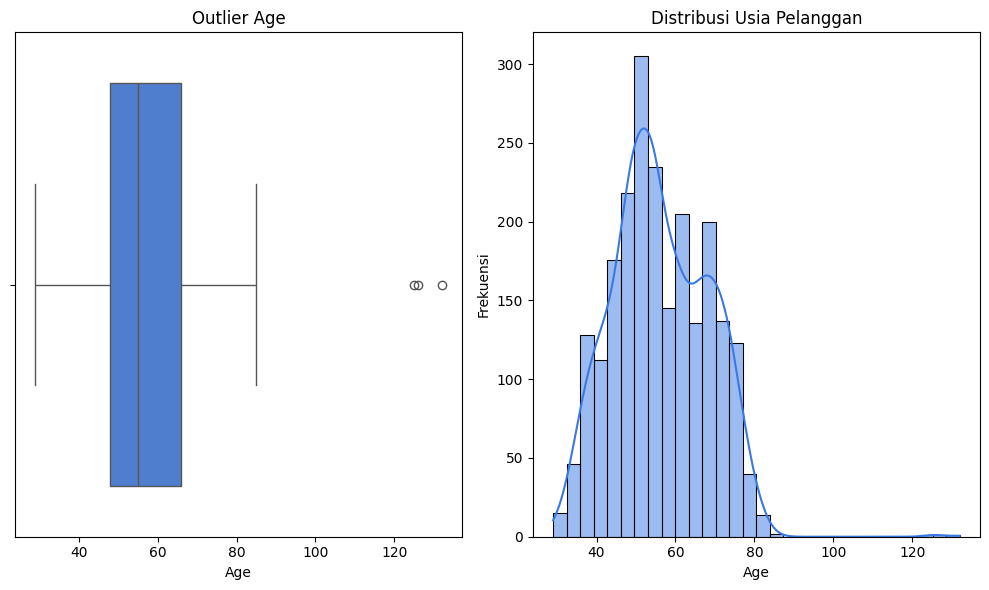

In [550]:
plt.figure(figsize=(10,6))

# Subplot kiri: Boxplot Age
plt.subplot(1, 2, 1)
sns.boxplot(
    x=df_clean['Age'],
    color="#3a78e4",
    orient='h'
)
plt.title('Outlier Age')
plt.xlabel('Age')
plt.ylabel('')

# Subplot kanan: Histogram Age
plt.subplot(1, 2, 2)
sns.histplot(
    df_clean['Age'],
    bins=30,
    kde=True,
    color="#3a78e4"
)
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Age')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [551]:
# Jumlah outliers mild pada kolom Age

q1 = df_clean["Age"].quantile(0.25)
q2 = df_clean["Age"].quantile(0.5)
q3 = df_clean["Age"].quantile(0.75)

display(q1, q2, q3)

iqr = q3 - q1

lower_age = q1 - 1.5 * iqr
upper_age = q3 + 1.5 * iqr

outlier_age = df_clean[df_clean["Age"] > upper_age].shape[0]
print(f"Jumlah outliers : {outlier_age}")
print(f"Persentase outliers(%) : {round(outlier_age / df_clean.shape[0], 4)}")

np.float64(48.0)

np.float64(55.0)

np.float64(66.0)

Jumlah outliers : 3
Persentase outliers(%) : 0.0013


Dari uji normalitas shapiro dan boxplot, ditemukan bahwa ada outliers pada variabel `Age`. Terdapat 3 data outliers (0,0013%) yang usianya lebih dari 120 tahun. Hal ini kemungkinan karena ada kesalahan pada reportingnya. Usia > 100 tahun sangat kecil kemungkinannya untuk masih hidup sehingga akan dihapus.

Selanjutnya akan handle outliers tersebut:

In [552]:
# Handle outliers dengan hapus data customer dengan usia > 100 tahun karena sangat kecil kemungkinan untuk masih hidup

df_clean = df_clean.drop(index=df_clean[df_clean['Age'] > 100].index)

df_clean.head()

,ID,Age,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,68,Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4
1,2174,71,Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2
2,4141,60,Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10
3,6182,41,Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4
4,5324,44,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6


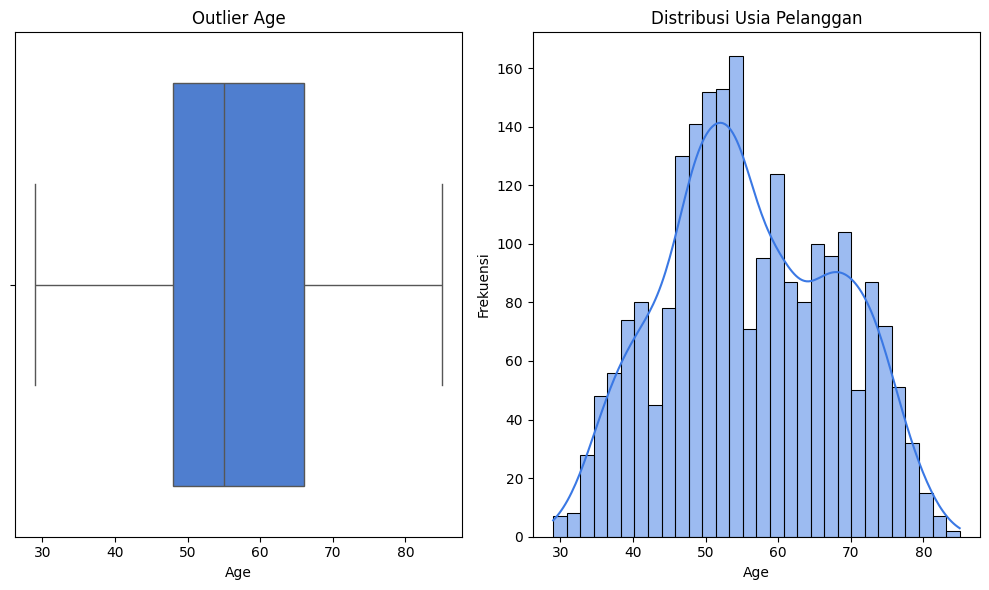

In [553]:
plt.figure(figsize=(10,6))

color_used = "#3a78e4"

# Subplot kiri: Boxplot Age
plt.subplot(1, 2, 1)
sns.boxplot(
    x=df_clean['Age'],
    color=color_used,
    orient='h'
)
plt.title('Outlier Age')
plt.xlabel('Age')
plt.ylabel('')

# Subplot kanan: Histogram Age + KDE
plt.subplot(1, 2, 2)
sns.histplot(
    df_clean['Age'],
    bins=30,
    kde=True,
    color=color_used
)
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Age')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Membuat kategori customer berdasarkan usia dengan membuat variabel baru `AgeCategory` :

🌍 Menurut WHO (World Health Organization):

- Adult / Dewasa	                : 25 – 44 tahun
- Middle-aged / Paruh baya        : 45 – 59 tahun
- Older adult / Dewasa lanjut     : 60 – 74 tahun
- Elderly / Lansia                : 75 – 84 tahun	
- Oldest old / Lanjut usia lanjut : 85+ tahun

In [554]:
# Membuat kolom baru AgeCategory

def age_category(age):
    if 29 <= age <= 44 :
        return 'Adult/Dewasa (29-44)'
    elif 45 <= age <= 59 :
        return 'Middle-age/Paruh baya (45-59)'
    else:
        return 'Elderly/Lansia (60+)'

# Tambahkan ke dataframe
df_clean.insert(2, 'AgeCategory', df_clean['Age'].apply(age_category))

In [555]:
df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6


### Handle Outliers dan Missing Values pada variabel `Income` :


#### 1. Handle Outliers pada variabel `Income`

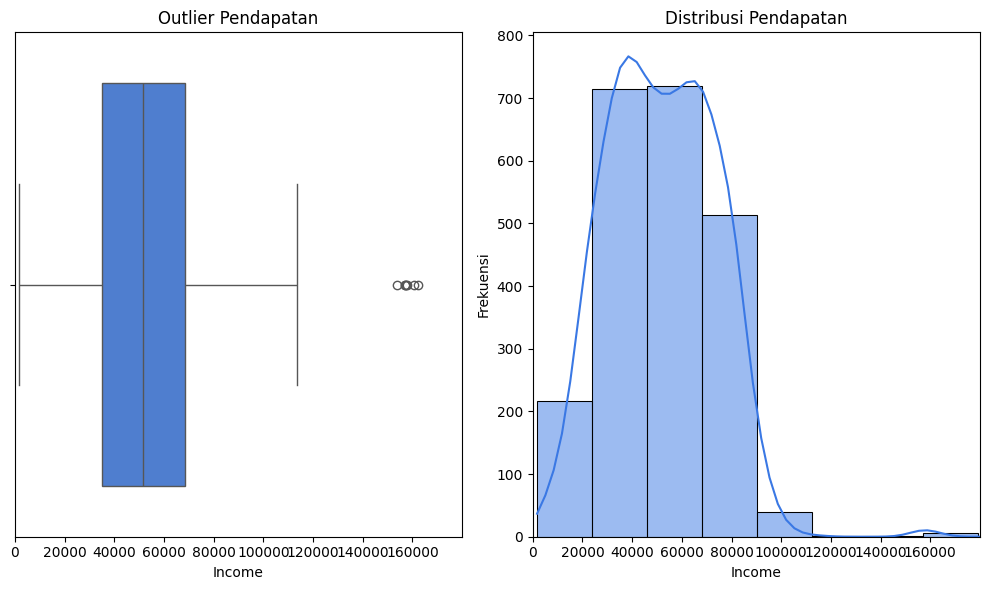

In [556]:
plt.figure(figsize=(10,6))

color_used = "#3a78e4"

# Subplot kiri: Boxplot Income
plt.subplot(1, 2, 1)
sns.boxplot(
    x=df_clean['Income'],
    color=color_used,
    orient='h'
)
plt.title('Outlier Pendapatan')
plt.xlim(0, 180000)
plt.xticks(range(0, 180000, 20000))
plt.xlabel('Income')
plt.ylabel('')

# Subplot kanan: Histogram Income + KDE
plt.subplot(1, 2, 2)
sns.histplot(
    df_clean['Income'],
    bins=30,
    kde=True,
    color=color_used
)
plt.title('Distribusi Pendapatan')
plt.xlim(0, 180000)
plt.xticks(range(0, 180000, 20000))
plt.xlabel('Income')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Dari boxplot, terdapat outliers mild dan outliers extreme pada variabel `Income`.

In [557]:
# Nilai min dan max pada kolom Income sebelum handling outliers

display(df_clean['Income'].min())
display(df_clean['Income'].max())

np.float64(1730.0)

np.float64(666666.0)

Selanjutnya akan hitung jumlah outliers mild dan outliers extremenya :

In [558]:
# Jumlah outliers mild pada kolom Income

q1 = df_clean["Income"].quantile(0.25)
q2 = df_clean["Income"].quantile(0.5)
q3 = df_clean["Income"].quantile(0.75)

iqr = q3 - q1

lower_income = q1 - 1.5 * iqr
upper_income = q3 + 1.5 * iqr

outlier_income = df_clean[(df_clean["Income"] < lower_income) | (df_clean["Income"] > upper_income)].shape[0]
print(f"Jumlah outliers : {outlier_income}")
print(f"Persentase outliers(%) : {round(outlier_income / df_clean.shape[0], 4)}")

# Jumlah Extreme Outliers pada kolom Income

q1 = df_clean["Income"].quantile(0.25)
q2 = df_clean["Income"].quantile(0.5)
q3 = df_clean["Income"].quantile(0.75)

iqr = q3 - q1

lower_extreme_income = q1 - 3 * iqr
upper_extreme_income = q3 + 3 * iqr

outlier_extreme_income = df_clean[(df_clean["Income"] < lower_extreme_income) | (df_clean["Income"] > upper_extreme_income)].shape[0]
print(f"Jumlah outliers extreme: {outlier_extreme_income}")
print(f"Persentase outliers(%) : {round(outlier_extreme_income / df_clean.shape[0], 4)}")

Jumlah outliers : 8
Persentase outliers(%) : 0.0036
Jumlah outliers extreme: 1
Persentase outliers(%) : 0.0004


In [559]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Age                  2237 non-null   int64  
 2   AgeCategory          2237 non-null   object 
 3   Education            2237 non-null   object 
 4   MaritalStatus        2237 non-null   object 
 5   Income               2213 non-null   float64
 6   Kidhome              2237 non-null   int64  
 7   Teenhome             2237 non-null   int64  
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  AcceptedCmp1         2237 non-null   int64 

Hapus extreme outlier:

In [560]:
# Hapus extreme outlier

index_extreme_income = df_clean['Income'].idxmax()
df_clean = df_clean.drop(index_extreme_income)

# Cek hasilnya setelah handling outliers Income
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Age                  2236 non-null   int64  
 2   AgeCategory          2236 non-null   object 
 3   Education            2236 non-null   object 
 4   MaritalStatus        2236 non-null   object 
 5   Income               2212 non-null   float64
 6   Kidhome              2236 non-null   int64  
 7   Teenhome             2236 non-null   int64  
 8   Recency              2236 non-null   int64  
 9   MntWines             2236 non-null   int64  
 10  MntFruits            2236 non-null   int64  
 11  MntMeatProducts      2236 non-null   int64  
 12  MntFishProducts      2236 non-null   int64  
 13  MntSweetProducts     2236 non-null   int64  
 14  MntGoldProds         2236 non-null   int64  
 15  AcceptedCmp1         2236 non-null   int64 

In [561]:
# Table outliers mild (Conditional Selecting data outliers mild)

outliers_income = df_clean[(df_clean["Income"] > upper_income)]

outliers_income['Income'].sort_values().reset_index()

,index,Income
0,655,153924.0
1,2132,156924.0
2,1653,157146.0
3,164,157243.0
4,1300,157733.0
5,687,160803.0
6,617,162397.0


Berdasarkan table outliers mild dan distribusi data variabel `Income` pada histogram di atas, data outliers mild masih masuk akal sehingga pada analisis ini tidak didrop atau dihapus.

#### 2. Handle Missing Values pada variabel `Income`

Cara penanganan missing values pada kolom Income, ada 2 pertimbangan:
1. Imputasi menggunakan Median: jika persentase missing value relatif kecil (<5%), jika terdapat outliers lebih baik imputasi menggunakan Median
2. Drop/delete: jika persentase missing value besar (>5%) karena terlalu banyak missing values

Dari tahap data understanding dan eksplorasi data awal, ditemukan bahwa missing values pada kolom `Income` sebesar 1,07%. Oleh karena itu, missing values pada income akan diimputasi dengan nilai Median dari Income per masing-masing kategori `Education`.

In [562]:
# Membuat median Income per Education

median_income_edu = df_clean[['Income', 'Education']].groupby('Education').median().reset_index()

display(median_income_edu)

median_income_edu_dict = median_income_edu.set_index('Education')['Income'].to_dict()

,Education,Income
0,Bachelor/Diploma,51983.0
1,HighSchool,20744.0
2,Master,49605.0
3,PhD,55185.0


In [563]:
# Imputasi Income dengan Median Income berdasarkan Education untuk filling missing values

def fill_values_income(row):
    if pd.isna(row['Income']):
        return median_income_edu_dict[row['Education']]
    return row['Income']

df_clean['Income'] = df_clean.apply(fill_values_income, axis=1)

In [564]:
# cek missing values setelah imputasi median untuk double check

df_clean.isna().sum()

ID                     0
Age                    0
AgeCategory            0
Education              0
MaritalStatus          0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp6           0
AcceptedCampaign       0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
dtype: int64

Selanjutnya, membuat variabel baru `IncomeCategory` yaitu kategori customer berdasarkan `Income` :

In [565]:
min_income = df_clean["Income"].min()
q1 = df_clean["Income"].quantile(0.25)
q2 = df_clean["Income"].quantile(0.50)
q3 = df_clean["Income"].quantile(0.75)
max_income = df_clean["Income"].max()

display(min_income)
display(q1)
display(q2)
display(q3)
display(max_income)

np.float64(1730.0)

np.float64(35502.5)

np.float64(51445.5)

np.float64(68275.75)

np.float64(162397.0)

In [566]:
# Membuat kolom baru IncomeCategory

def income_category(income):
    if 0 <= income <= 50000 :
        return '<50K'
    elif 50000 < income <= 70000 :
        return '50K-70K'
    else:
        return '>70K'

# Tambahkan ke dataframe
df_clean.insert(6, 'IncomeCategory', df_clean['Income'].apply(income_category))

In [567]:
# cek kembali unique valuesnya untuk double check

df_clean['IncomeCategory'].unique()

array(['50K-70K', '<50K', '>70K'], dtype=object)

### Handle outliers pada variabel `Recency`

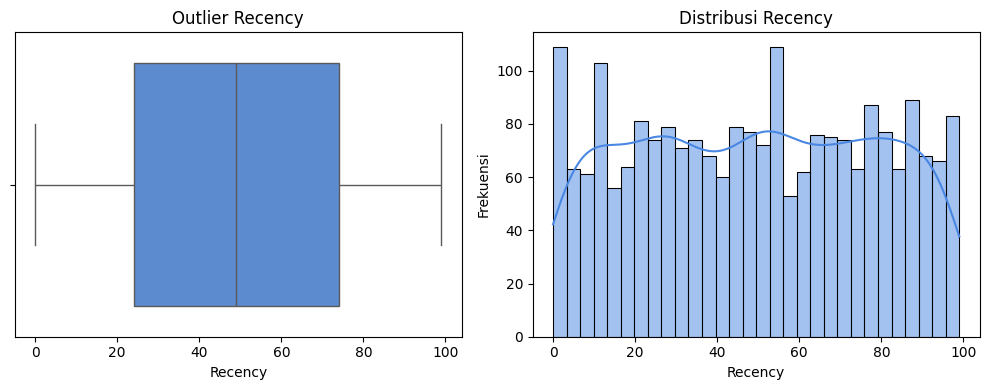

In [568]:
plt.figure(figsize=(10,4))

color_used = "#4987e3"

# Subplot kiri: Boxplot Recency
plt.subplot(1, 2, 1)
sns.boxplot(
    x=df_clean['Recency'],
    color=color_used,
    orient='h'
)
plt.title('Outlier Recency')
plt.xlabel('Recency')
plt.ylabel('')

# Subplot kanan: Histogram Recency + KDE
plt.subplot(1, 2, 2)
sns.histplot(
    df_clean['Recency'],
    bins=30,
    kde=True,
    color=color_used
)
plt.title('Distribusi Recency')
plt.xlabel('Recency')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


Berdasarkan boxplot dan historgram di atas, tidak ada data outliers pada variabel `Recency` dan berdistribusi uniform sehingga dapat langsung digunakan untuk analisis.

### Membuat variabel baru `TotalSpending` untuk menghitung Total Spending Customer pada semua produk.

In [569]:
#Menambahkan variabel Total Spending

df_clean['TotalSpending'] = df_clean['MntWines'] + df_clean['MntFruits'] + df_clean['MntMeatProducts'] + df_clean['MntFishProducts'] + df_clean['MntSweetProducts'] + df_clean['MntGoldProds']

df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalSpending
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,0,0,0,0,0,1,Yes,3,8,10,4,1617
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,0,0,0,0,0,0,No,2,1,1,2,27
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,0,0,0,0,0,0,No,1,8,2,10,776
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,0,0,0,0,0,0,No,2,2,0,4,53
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,0,0,0,0,0,0,No,5,5,3,6,422


In [570]:
#rearrange urutan kolom dalam dataset agar lebih rapi

df_clean = df_clean[[# People 
    'ID', 'Age', 'AgeCategory', 'Education', 'MaritalStatus', 'Income', 'IncomeCategory',
    'Kidhome', 'Teenhome', 'Recency',
    # Products
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
    'MntSweetProducts', 'MntGoldProds', 'TotalSpending',
    # Promotion (dengan urutan AcceptedCmp1,2,dst)
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6', 'AcceptedCampaign', 'NumDealsPurchases', 
    # Place
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,1617,0,0,0,0,0,1,Yes,3,8,10,4
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,27,0,0,0,0,0,0,No,2,1,1,2
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,776,0,0,0,0,0,0,No,1,8,2,10
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,53,0,0,0,0,0,0,No,2,2,0,4
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,422,0,0,0,0,0,0,No,5,5,3,6


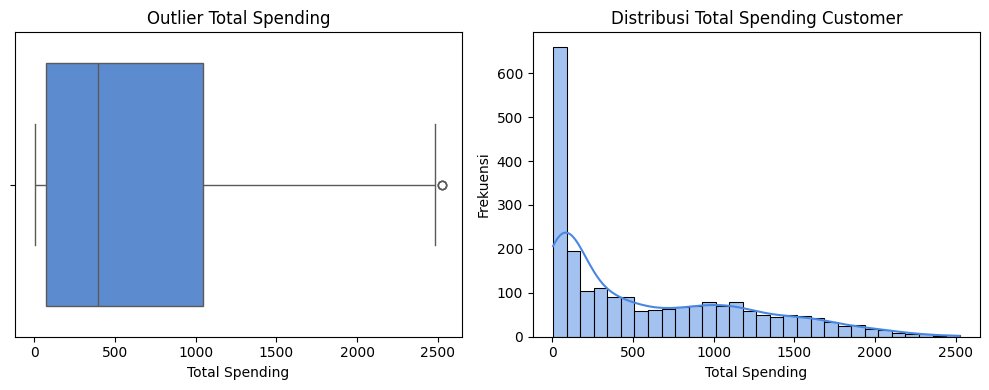

In [571]:
plt.figure(figsize=(10,4))

color_used = "#4987e3"

# Subplot kiri: Boxplot Total Spending
plt.subplot(1, 2, 1)
sns.boxplot(
    x=df_clean['TotalSpending'],
    color=color_used,
    orient='h'
)
plt.title('Outlier Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('')

# Subplot kanan: Histogram Total Spending + KDE
plt.subplot(1, 2, 2)
sns.histplot(
    df_clean['TotalSpending'],
    bins=30,
    kde=True,
    color=color_used
)
plt.title('Distribusi Total Spending Customer')
plt.xlabel('Total Spending')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [572]:
# Jumlah outliers pada kolom Total Spending

q1 = df_clean['TotalSpending'].quantile(0.25)
q2 = df_clean['TotalSpending'].quantile(0.5)
q3 = df_clean['TotalSpending'].quantile(0.75)

iqr = q3 - q1

lower_spending = q1 - 1.5 * iqr
upper_spending = q3 + 1.5 * iqr

outlier_spending = df_clean[(df_clean['TotalSpending'] < lower_spending) | (df_clean['TotalSpending'] > upper_spending)].shape[0]
print(f'Jumlah outliers : {outlier_spending}')
print(f'Persentase outliers(%) : {round(outlier_spending / df_clean.shape[0], 4)}')

Jumlah outliers : 3
Persentase outliers(%) : 0.0013


In [573]:
# Conditional Selecting data outliers

df_clean_outliers = df_clean[(df_clean['TotalSpending'] > upper_spending)]

df_clean_outliers['TotalSpending'].sort_values().reset_index()

,index,TotalSpending
0,1492,2524
1,1179,2525
2,1572,2525


Data outliers pada `TotalSpending` masih masuk akal sehingga pada analisis ini tidak didrop atau dihapus.

### Handling Outliers pada variabel `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`.

#### Boxplot untuk cek outliers semua variabel

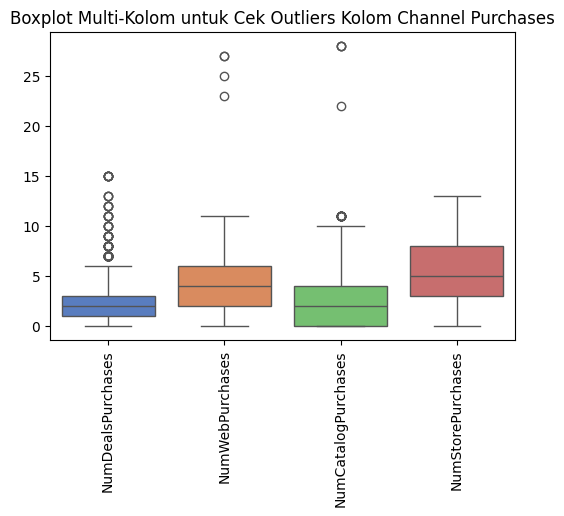

In [574]:
transactions = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

plt.figure(figsize=(6,4))
sns.boxplot(df_clean[transactions], palette = 'muted')
plt.title('Boxplot Multi-Kolom untuk Cek Outliers Kolom Channel Purchases')
plt.xticks(rotation=90)
plt.show()

Dari Boxplot, terdapat outliers pada `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases` dan `NumWebVisitsMonth`. Sementara `NumStorePurchases` tidak ada outliers sehingga bisa langsung digunakan untuk analisis.

#### Handling Outliers

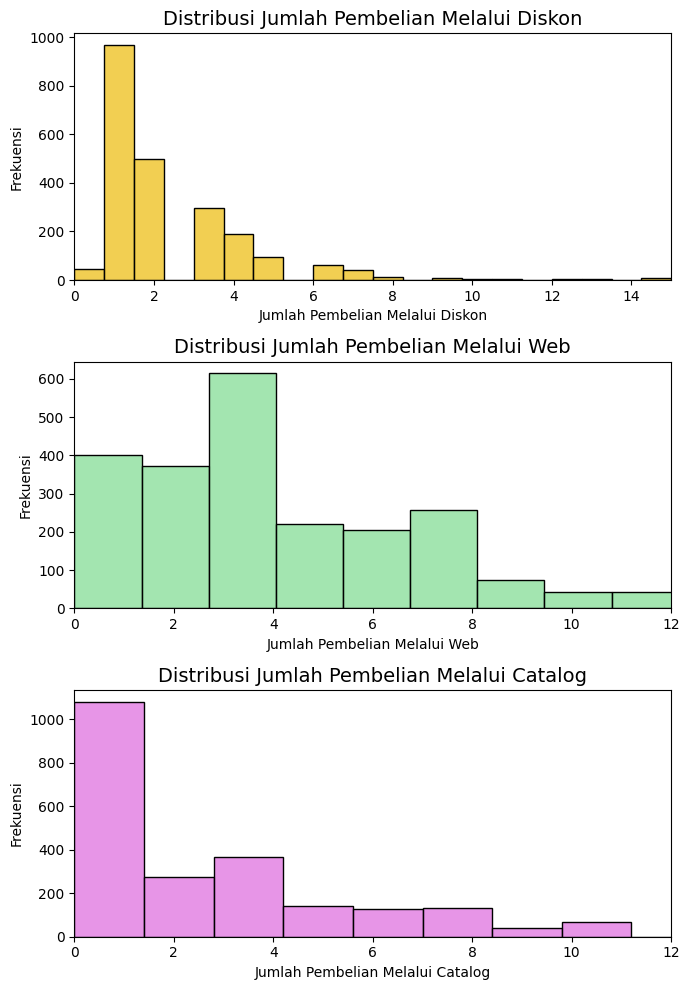

In [575]:
plots = [
    {
        "column": "NumDealsPurchases",
        "title": "Distribusi Jumlah Pembelian Melalui Diskon",
        "color": "#eec018",
        "xlabel": "Jumlah Pembelian Melalui Diskon",
        "xlim": (0, 15),
        "xticks": range(0, 16, 2)
    },
    {
        "column": "NumWebPurchases",
        "title": "Distribusi Jumlah Pembelian Melalui Web",
        "color": "#85DD96",
        "xlabel": "Jumlah Pembelian Melalui Web",
        "xlim": (0, 12),
        "xticks": range(0, 13, 2)
    },
    {
        "column": "NumCatalogPurchases",
        "title": "Distribusi Jumlah Pembelian Melalui Catalog",
        "color": "#e072e0",
        "xlabel": "Jumlah Pembelian Melalui Catalog",
        "xlim": (0, 12),
        "xticks": range(0, 13, 2)
    }
]

# Buat subplot vertikal
plt.figure(figsize=(7, 10))

for i, plot in enumerate(plots, start=1):
    plt.subplot(len(plots), 1, i)
    
    sns.histplot(
        df_clean[plot["column"]],
        color=plot["color"],
        bins=20
    )
    
    plt.title(plot["title"], size=14)
    plt.xlabel(plot["xlabel"])
    plt.ylabel("Frekuensi")
    plt.xlim(plot["xlim"])
    plt.xticks(plot["xticks"])

plt.tight_layout()
plt.show()


Dari distribusi data di atas:
- Data outliers pada `NumDealsPurchases` masih masuk akal sehingga pada analisis ini tidak didrop atau dihapus.
- Data outliers pada `NumWebPurchases` masih masuk akal sehingga pada analisis ini tidak didrop atau dihapus.
- Data outliers pada `NumCatalogPurchases` masih masuk akal sehingga pada analisis ini tidak didrop atau dihapus.

### Menambahkan variabel `TotalTransactions` untuk total jumlah transaksi customer.

In [576]:
df_clean['TotalTransactions'] = df_clean['NumDealsPurchases'] + df_clean['NumWebPurchases'] + df_clean['NumCatalogPurchases'] + df_clean['NumStorePurchases']

df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalTransactions
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,1617,0,0,0,0,0,1,Yes,3,8,10,4,25
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,27,0,0,0,0,0,0,No,2,1,1,2,6
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,776,0,0,0,0,0,0,No,1,8,2,10,21
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,53,0,0,0,0,0,0,No,2,2,0,4,8
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,422,0,0,0,0,0,0,No,5,5,3,6,19


#### Handle outliers pada variabel `TotalTransactions`

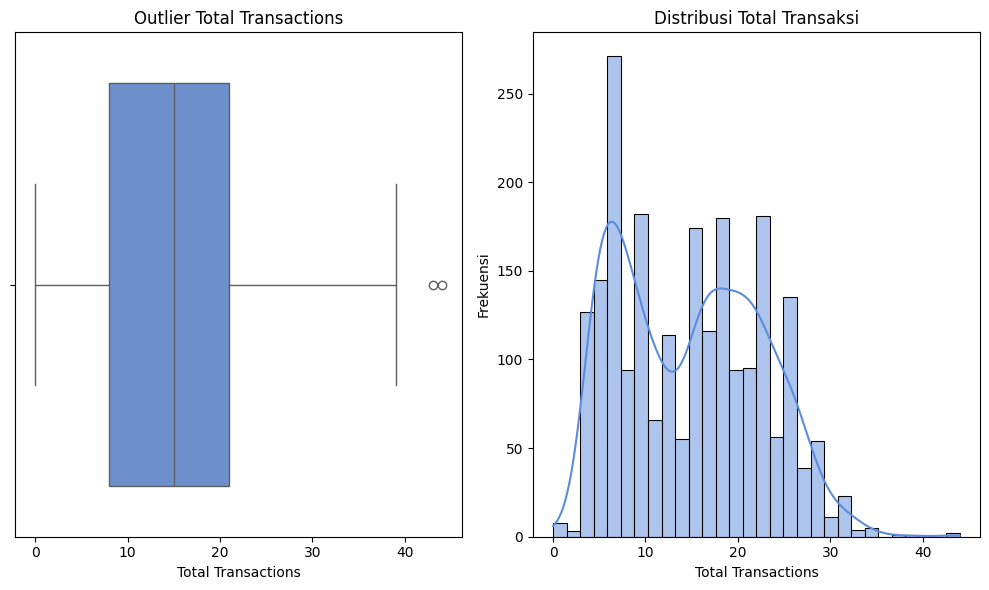

In [577]:
plt.figure(figsize=(10,6))

color_used = "#5d8cdd"  # samakan dengan Recency & Total Spending kalau mau konsisten

# Subplot kiri: Boxplot Total Transactions
plt.subplot(1, 2, 1)
sns.boxplot(
    x=df_clean['TotalTransactions'],
    color=color_used,
    orient='h'
)
plt.title('Outlier Total Transactions')
plt.xlabel('Total Transactions')
plt.ylabel('')

# Subplot kanan: Histogram Total Transactions + KDE
plt.subplot(1, 2, 2)
sns.histplot(
    df_clean['TotalTransactions'],
    bins=30,
    kde=True,
    color=color_used
)
plt.title('Distribusi Total Transaksi')
plt.xlabel('Total Transactions')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


Dari boxplot di atas, tidak terdapat outliers pada variabel `TotalChannelTransactions`. Dari distribusi data di atas, data outliers pada `TotalTransactions` masih masuk akal sehingga pada analisis ini tidak didrop atau dihapus.

**Save Cleaned Data to CSV**

In [646]:
df_clean.to_csv('df_clean_RFM.csv', index=False)

Selanjutnya setelah data cleaning, akan dilakukan Exploratory Data Analysis.

# **4. Exploratory Data Analysis**

In [579]:
df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalTransactions
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,1617,0,0,0,0,0,1,Yes,3,8,10,4,25
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,27,0,0,0,0,0,0,No,2,1,1,2,6
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,776,0,0,0,0,0,0,No,1,8,2,10,21
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,53,0,0,0,0,0,0,No,2,2,0,4,8
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,422,0,0,0,0,0,0,No,5,5,3,6,19


Untuk memahami variabel yang berkorelasi secara signifikan terhadap recency, frekuensi dan monetary, data yang telah dicleaning akan dieksplorasi dan dianalisis.

## **Marketing Campaign Effectiveness Evaluation**

In [580]:
campaign_cols = df_clean[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                          'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']]

# hitung jumlah accepted per campaign
campaign_sum = campaign_cols.sum()

# hitung total customer
total_customers = df_clean.shape[0]

# hitung persentase acceptance rate tiap campaign
campaign_percentage = ((campaign_sum / total_customers) * 100).round(1)

# buat DataFrame
campaign_summary = pd.DataFrame({
    'Campaign': campaign_sum.index,
    'Total Accepted': campaign_sum.values,
    'Acceptance Rate (%)': campaign_percentage.values
})

# Hitung persentase not accepted
campaign_summary['Not Accepted Rate (%)'] = (100 - campaign_summary['Acceptance Rate (%)']).round(1)

campaign_summary

,Campaign,Total Accepted,Acceptance Rate (%),Not Accepted Rate (%)
0,AcceptedCmp1,144,6.4,93.6
1,AcceptedCmp2,30,1.3,98.7
2,AcceptedCmp3,163,7.3,92.7
3,AcceptedCmp4,167,7.5,92.5
4,AcceptedCmp5,162,7.2,92.8
5,AcceptedCmp6,334,14.9,85.1


- Secara umum, tingkat respons pelanggan terhadap kampanye pemasaran masih tergolong rendah, dengan sebagian besar kampanye hanya mencapai response rate sekitar 6–7%.
- Campaign 2 (AcceptedCmp2) mencatat respons terendah, dengan tingkat penerimaan hanya sekitar 1,3%, yang menunjukkan kampanye ini kurang menarik bagi mayoritas pelanggan.
- Campaign 6 (AcceptedCmp6) memiliki respons tertinggi, dengan acceptance rate sekitar 14,9%, sehingga lebih efektif dibandingkan kampanye lainnya.
- Meskipun terdapat satu kampanye yang menonjol (Campaign 6), sebagian besar kampanye memiliki acceptance rate di bawah 8%, yang **mengindikasikan pendekatan pemasaran masih bersifat mass campaign**.
- Insight ini menegaskan perlunya **segmentasi pelanggan berbasis pola perilaku agar kampanye pemasaran dan strategi perlakuan menjadi lebih tepat sasaran**, **meningkatkan efektivitas campaign** sehingga **campaign acceptance rate juga semakin meningkat** dan **meningkatkan retensi pelanggan**.

## **Heatmap Correlation Variable Numericals `Age`, `Income`, `Recency`, `TotalSpending`, `TotalTransactions`**

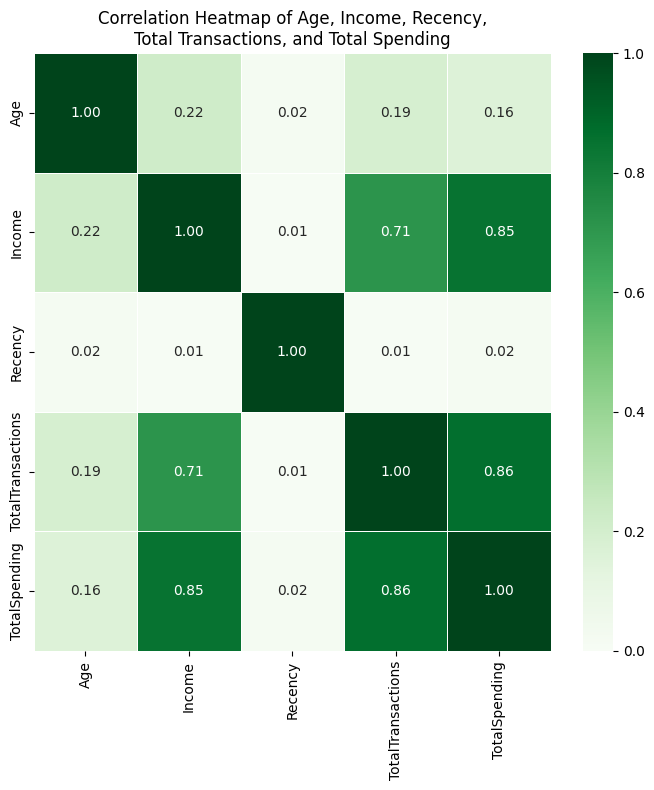

In [581]:
# Pilih kolom numerik yang mau dianalisis
cols = ["Age", "Income", "Recency", "TotalTransactions", "TotalSpending"]

# Hitung correlation matrix (Spearman)
corr_matrix = df_clean[cols].corr(method="spearman")

# Plot heatmap
plt.figure(figsize=(7,8))

sns.heatmap(
    corr_matrix,
    annot=True,             
    fmt=".2f",               
    cmap="Greens",           
    vmin=0, vmax=1,         
    linewidths=0.5
)

plt.title("Correlation Heatmap of Age, Income, Recency,\nTotal Transactions, and Total Spending")
plt.xticks(rotation=90)
plt.yticks(rotation=90)

plt.tight_layout()
plt.show()

Berdasarkan heatmap correlation analysis:
- `Income` adalah yang paling berkorelasi dengan `TotalSpending` dan `TotalTransactions` dengan arah korelasi yang positif. Hal ini berarti semakin besar Income maka semakin besar Total Spending dan Total Transactions.
- `TotalSpending` memiliki korelasi yang kuat terhadap `TotalTransactions` dengan arah korelasi yang positif. Hal ini berarti seiring meningkatnya total spending, total transaksi juga meningkat.
- `Age` memiliki korelasi yang lemah terhadap `TotalSpending` dengan arah korelasi yang positif. Hal ini berarti seiring meningkatnya usia, total spending juga meningkat.
- `Age`dan `Income` memiliki korelasi yang lemah terhadap `Recency` dengan arah korelasi yang positif. Hal ini berarti seiring meningkatnya usia, total spending juga meningkat.
- `Recency` memiliki korelasi yang lemah terhadap `TotalSpending` dengan arah korelasi yang positif. Hal ini berarti seiring meningkatnya recency, total spending juga meningkat.
- `Recency` memiliki korelasi yang lemah terhadap `TotalTransactions` dengan arah korelasi yang positif. Hal ini berarti seiring meningkatnya recency, total spending juga meningkat.

In [582]:
# Uji Normalitas Data R, F, M

columns = ['Recency', 'TotalSpending', 'TotalTransactions']

# Uji normalitas untuk tiap variabel
for col in columns:
    stat, pval = shapiro(df_clean[col])
    
    print(f"nilai p-val = {pval}")

    if pval < 0.05:
        print("Data tidak terdistribusi normal")
    else:
        print("Data terdistribusi normal")
    
    print("-" * 40)

nilai p-val = 5.870508463524013e-26
Data tidak terdistribusi normal
----------------------------------------
nilai p-val = 3.260557527315455e-40
Data tidak terdistribusi normal
----------------------------------------
nilai p-val = 6.611243925568342e-26
Data tidak terdistribusi normal
----------------------------------------


## **Analisis Pola Perilaku Pelanggan (R,F,M)**

Dalam analisis ini, segmentasi pelanggan dilakukan dengan menganalisis pola perilaku pelanggan metode RFM (Recency, Frequency, Monetary). Pendekatan ini membantu mengelompokkan pelanggan berdasarkan seberapa baru, sering, dan besar nilai transaksi mereka sehingga perusahaan dapat memprioritaskan campaign yang lebih efektif sesuai karakteristik setiap segmen pelanggan.
- R (Recency) → Kapan terakhir kali pelanggan melakukan transaksi
- F (Frequency) → Seberapa sering pelanggan bertransaksi
- M (Monetary) → Berapa besar nilai total uang yang dikeluarkan pelanggan

Studi sebelumnya menunjukkan bahwa model seperti RFM efektif dalam memetakan perilaku pelanggan dan mendukung strategi pemasaran yang lebih tepat sasaran. Misalnya, dalam penelitian kasus penerapan RFM untuk segmentasi pelanggan, model RFM terbukti membantu mengelompokkan pelanggan berdasarkan perilaku transaksi mereka dan mendukung pengambilan keputusan pemasaran berbasis data seperti kampanye retensi dan loyalitas pelanggan.

>Referensi:
> - Aliya Anisa Rahma dkk. (2025) — Optimalisasi Strategi Pemasaran melalui Segmentasi Pelanggan dengan Analisis RFM dan K-Means.
Penelitian ini menunjukkan RFM digunakan untuk segmentasi dan kemudian digunakan untuk menyusun strategi pemasaran yang lebih terarah dan meningkatkan loyalitas/efektivitas kampanye. [Reference](https://ejournal.akakom.ac.id/index.php/jiko/article/view/1737?utm_source=chatgpt.com)


Berdasarkan uji normalitas sebelumnya, Recency, Frequency (Total Transactions) dan Monetary (Total Spending) terdistribusi secara tidak normal maka akan digunakan median untuk analisisnya.

### **Analisis Pola Perilaku Pelanggan Berdasarkan Recency**

#### **1. Age Category vs Recency**

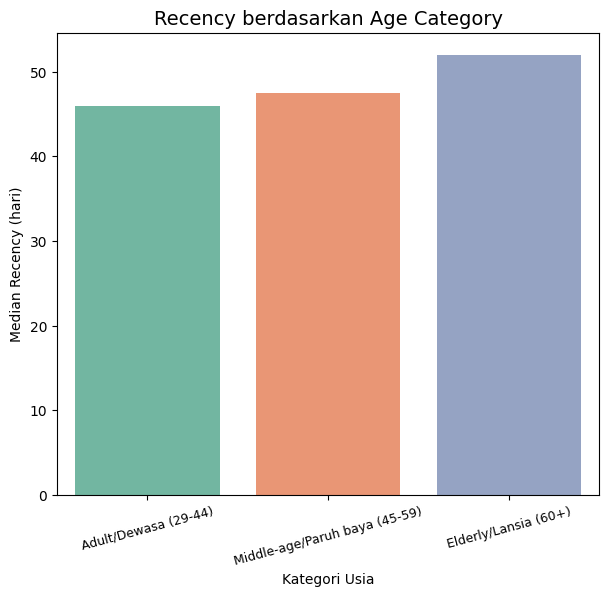

In [583]:
plt.figure(figsize=(7,6))

sns.barplot(
    data=df_clean,
    x='AgeCategory',
    y='Recency',
    estimator='median',
    errorbar=None,
    palette='Set2',
    order=[
        'Adult/Dewasa (29-44)', 
        'Middle-age/Paruh baya (45-59)', 
        'Elderly/Lansia (60+)'
    ]
)

plt.title('Recency berdasarkan Age Category', size=14)
plt.xlabel('Kategori Usia', size=10)
plt.ylabel('Median Recency (hari)', size=10)
plt.xticks(rotation=15, size=9)
plt.show()

- Terdapat sedikit perbedaan antara rata-rata recency pada tiap kategori usia.

### Apakah ada perbedaan secara signifikan antara rata-rata/median recency berdasarkan kategori usia?

Hipotesis:

- H0 = Tidak terdapat perbedaan yang signifikan pada median recency antar tiap kategori usia.
- H1 = Setidaknya terdapat satu kategori usia yang memiliki median recency yang berbeda secara signifikan dibandingkan kategori usia lainnya.

In [584]:
stat_kruskal, pval_kruskal = kruskal(
    df_clean[df_clean['AgeCategory'] == 'Adult/Dewasa (29-44)']['Recency'],
    df_clean[df_clean['AgeCategory'] == 'Middle-age/Paruh baya (45-59)']['Recency'],
    df_clean[df_clean['AgeCategory'] == 'Elderly/Lansia (60+)']['Recency']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Setidaknya terdapat satu kategori usia yang memiliki median recency yang berbeda secara signifikan dibandingkan kategori usia lain.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan yang signifikan pada median recency antar tiap kategori usia.")

Gagal menolak H0, Tidak terdapat perbedaan yang signifikan pada median recency antar tiap kategori usia.


- Tidak terdapat perbedaan signifikan antara median recency pada tiap kategori usia

#### **2. Education vs Recency**

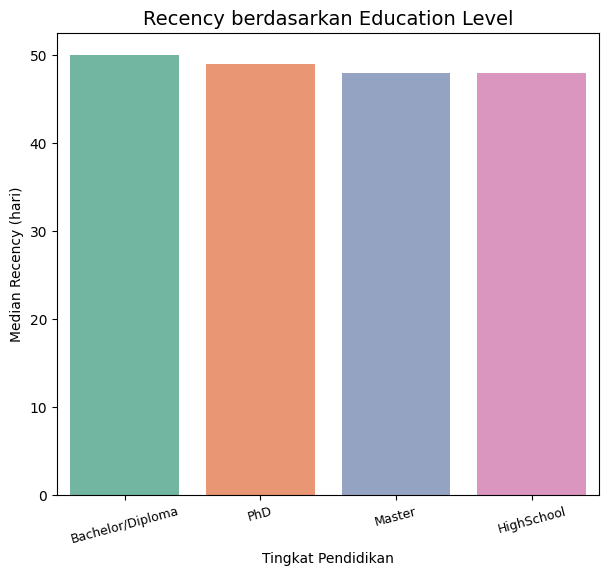

In [585]:
plt.figure(figsize=(7,6))

sns.barplot(
    data=df_clean,
    x='Education',
    y='Recency',
    estimator='median',
    errorbar=None,
    palette='Set2',
    order=[
        'Bachelor/Diploma', 'PhD', 'Master', 'HighSchool'
    ]
)

plt.title('Recency berdasarkan Education Level', size=14)
plt.xlabel('Tingkat Pendidikan', size=10)
plt.ylabel('Median Recency (hari)', size=10)
plt.xticks(rotation=15, size=9)
plt.show()

- Terdapat sedikit perbedaan antara median recency pada tiap kategori tingkat pendidikan.

### Apakah ada perbedaan secara signifikan antara rata-rata/median recency berdasarkan tingkat pendidikan?

Hipotesis:

- H0 = Tidak terdapat perbedaan yang signifikan pada median recency antar tingkat pendidikan.
- H1 = Setidaknya terdapat satu tingkat pendidikan yang memiliki median recency yang berbeda secara signifikan dibandingkan tingkat pendidikan lainnya.

In [586]:
stat_kruskal, pval_kruskal = kruskal(
    df_clean[df_clean['Education'] == 'Bachelor/Diploma']['Recency'],
    df_clean[df_clean['Education'] == 'Master']['Recency'],
    df_clean[df_clean['Education'] == 'PhD']['Recency'],
    df_clean[df_clean['Education'] == 'HighSchool']['Recency']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Setidaknya terdapat satu tingkat pendidikan yang memiliki median recency yang berbeda secara signifikan dibandingkan tingkat pendidikan lain.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan yang signifikan pada median recency antar tingkat pendidikan.")

Gagal menolak H0, Tidak terdapat perbedaan yang signifikan pada median recency antar tingkat pendidikan.


#### **3. Marital Status vs Recency**

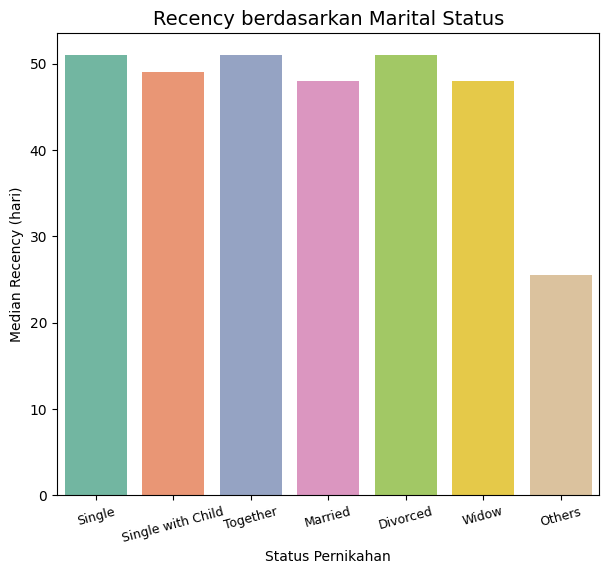

In [587]:
plt.figure(figsize=(7,6))

sns.barplot(
    data=df_clean,
    x='MaritalStatus',
    y='Recency',
    estimator='median',
    errorbar=None,
    palette='Set2',
    order=[
        'Single', 'Single with Child', 'Together', 'Married', 'Divorced',
       'Widow', 'Others'
    ]
)

plt.title('Recency berdasarkan Marital Status', size=14)
plt.xlabel('Status Pernikahan', size=10)
plt.ylabel('Median Recency (hari)', size=10)
plt.xticks(rotation=15, size=9)
plt.show()

- Terdapat perbedaan antara rata-rata recency pada tiap kategori status pernikahan.

### Apakah ada perbedaan secara signifikan antara rata-rata/median recency berdasarkan kategori status pernikahan?

Hipotesis:

- H0 = Tidak terdapat perbedaan yang signifikan pada median recency antar tiap kategori status pernikahan.
- H1 = Setidaknya terdapat satu tingkat pendidikan yang memiliki median recency yang berbeda secara signifikan dibandingkan kategori status pernikahan lainnya.

In [588]:
stat_kruskal, pval_kruskal = kruskal(
    df_clean[df_clean['MaritalStatus'] == 'Single']['Recency'],
    df_clean[df_clean['MaritalStatus'] == 'Single with Child']['Recency'],
    df_clean[df_clean['MaritalStatus'] == 'Together']['Recency'],
    df_clean[df_clean['MaritalStatus'] == 'Married']['Recency'],
    df_clean[df_clean['MaritalStatus'] == 'Divorced']['Recency'],
    df_clean[df_clean['MaritalStatus'] == 'Widow']['Recency'],
    df_clean[df_clean['MaritalStatus'] == 'Others']['Recency']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Setidaknya terdapat satu kategori status pernikahan dengan median recency berbeda secara signifikan dengan kategori status pernikahan lain.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan median recency yang signifikan antar kategori status pernikahan.")

Gagal menolak H0, Tidak terdapat perbedaan median recency yang signifikan antar kategori status pernikahan.


#### **4. Income Level vs Recency**

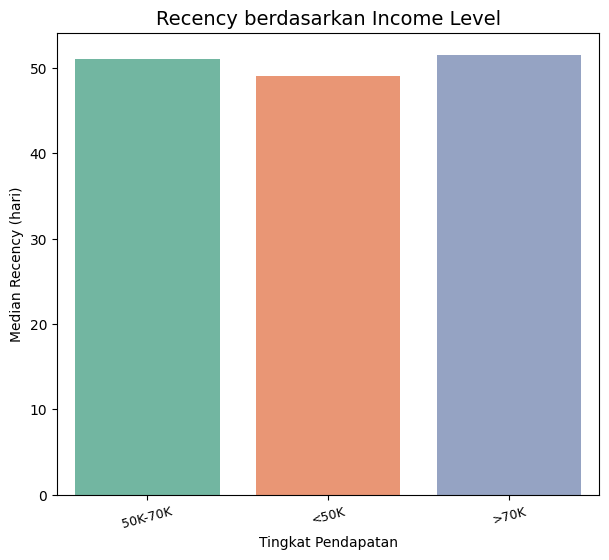

In [589]:
plt.figure(figsize=(7,6))

sns.barplot(
    data=df_clean,
    x='IncomeCategory',
    y='Recency',
    estimator='median',
    errorbar=None,
    palette='Set2',
    order=[
        '50K-70K', '<50K', '>70K'
    ]
)

plt.title('Recency berdasarkan Income Level', size=14)
plt.xlabel('Tingkat Pendapatan', size=10)
plt.ylabel('Median Recency (hari)', size=10)
plt.xticks(rotation=15, size=9)
plt.show()

- Terdapat sedikit perbedaan antara rata-rata recency pada tiap tingkat pendidikan.

### Apakah ada perbedaan secara signifikan antara rata-rata/median recency berdasarkan kategori tingkat pendapatan?

Hipotesis:

- H0 = Tidak terdapat perbedaan yang signifikan pada median recency antar kategori tingkat pendapatan.
- H1 = Setidaknya terdapat satu tingkat pendidikan yang memiliki median recency yang berbeda secara signifikan dibandingkan kategori tingkat pendapatan lain.

In [590]:
stat_kruskal, pval_kruskal = kruskal(
    df_clean[df_clean['IncomeCategory'] == '<50K']['Recency'],
    df_clean[df_clean['IncomeCategory'] == '50K-70K']['Recency'],
    df_clean[df_clean['IncomeCategory'] == '>70K']['Recency']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Setidaknya terdapat satu kategori tingkat pendapatan dengan median recency berbeda secara signifikan dengan kategori tingkat pendapatan lain.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan median recency yang signifikan antar kategori tingkat pendapatan.")

Gagal menolak H0, Tidak terdapat perbedaan median recency yang signifikan antar kategori tingkat pendapatan.


**Tidak ada perbedaan signifikan antara Recency pada tiap kategori usia, tingkat pendidikan, status pernikahan dan tingkat pendapatan.**

### **Analisis Pola Perilaku Pelanggan Berdasarkan Frequency (Total Transactions)**

#### **1. Age Category vs Frequency**

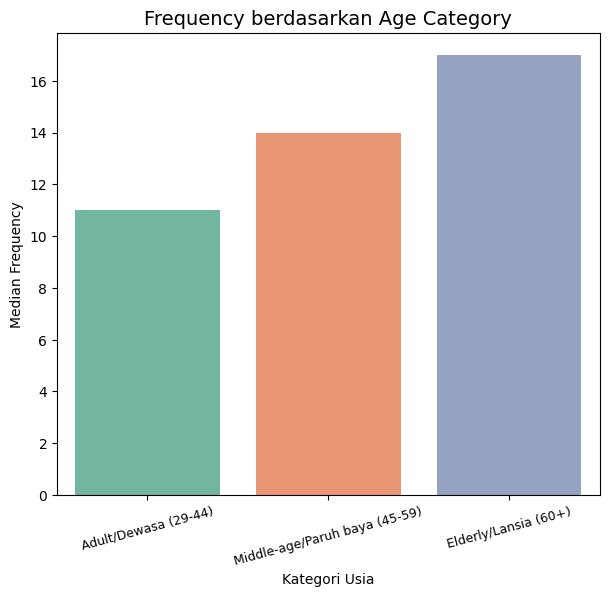

In [591]:
plt.figure(figsize=(7,6))

sns.barplot(
    data=df_clean,
    x='AgeCategory',
    y='TotalTransactions',
    estimator='median',
    errorbar=None,
    palette='Set2',
    order=[
        'Adult/Dewasa (29-44)', 
        'Middle-age/Paruh baya (45-59)', 
        'Elderly/Lansia (60+)'
    ]
)

plt.title('Frequency berdasarkan Age Category', size=14)
plt.xlabel('Kategori Usia', size=10)
plt.ylabel('Median Frequency', size=10)
plt.xticks(rotation=15, size=9)
plt.show()

- Terdapat perbedaan antara rata-rata frequency pada tiap kategori usia.

### Apakah ada perbedaan secara signifikan antara median frequency berdasarkan kategori usia?

Hipotesis:

- H0 = Tidak terdapat perbedaan yang signifikan pada median frequency antar tiap kategori usia.
- H1 = Setidaknya terdapat satu kategori usia yang memiliki median frequency yang berbeda secara signifikan dibandingkan kategori usia lainnya.

In [592]:
stat_kruskal, pval_kruskal = kruskal(
    df_clean[df_clean['AgeCategory'] == 'Adult/Dewasa (29-44)']['TotalTransactions'],
    df_clean[df_clean['AgeCategory'] == 'Middle-age/Paruh baya (45-59)']['TotalTransactions'],
    df_clean[df_clean['AgeCategory'] == 'Elderly/Lansia (60+)']['TotalTransactions']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Setidaknya terdapat satu kategori usia yang memiliki median frequency yang berbeda secara signifikan dibandingkan kategori usia lain.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan yang signifikan pada median frequency antar tiap kategori usia.")

Tolak H0, Setidaknya terdapat satu kategori usia yang memiliki median frequency yang berbeda secara signifikan dibandingkan kategori usia lain.


#### **2. Education vs Frequency**

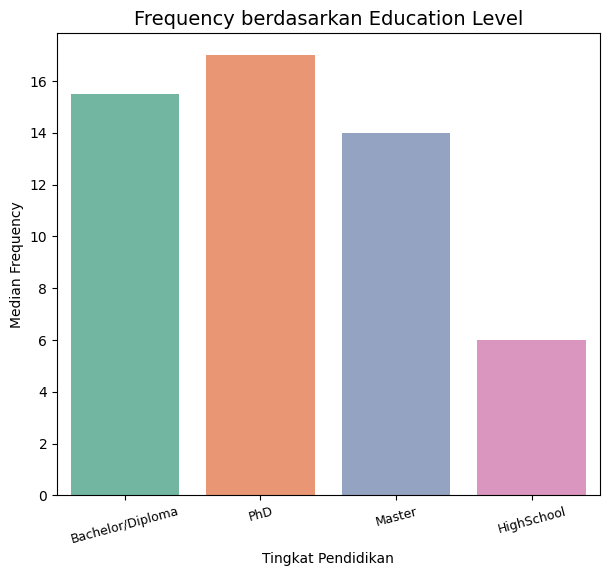

In [593]:
plt.figure(figsize=(7,6))

sns.barplot(
    data=df_clean,
    x='Education',
    y='TotalTransactions',
    estimator='median',
    errorbar=None,
    palette='Set2',
    order=[
        'Bachelor/Diploma', 'PhD', 'Master', 'HighSchool'
    ]
)

plt.title('Frequency berdasarkan Education Level', size=14)
plt.xlabel('Tingkat Pendidikan', size=10)
plt.ylabel('Median Frequency', size=10)
plt.xticks(rotation=15, size=9)
plt.show()

- Terdapat perbedaan antara rata-rata frequency pada tiap kategori tingkat pendidikan.

### Apakah ada perbedaan secara signifikan antara rata-rata/median recency berdasarkan tingkat pendidikan?

Hipotesis:

- H0 = Tidak terdapat perbedaan yang signifikan pada median recency antar tingkat pendidikan.
- H1 = Setidaknya terdapat satu tingkat pendidikan yang memiliki median recency yang berbeda secara signifikan dibandingkan tingkat pendidikan lainnya.

In [594]:
stat_kruskal, pval_kruskal = kruskal(
    df_clean[df_clean['Education'] == 'Bachelor/Diploma']['TotalTransactions'],
    df_clean[df_clean['Education'] == 'Master']['TotalTransactions'],
    df_clean[df_clean['Education'] == 'PhD']['TotalTransactions'],
    df_clean[df_clean['Education'] == 'HighSchool']['TotalTransactions']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Setidaknya terdapat satu tingkat pendidikan yang memiliki median frequency yang berbeda secara signifikan dibandingkan tingkat pendidikan lain.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan yang signifikan pada median frequency antar tingkat pendidikan.")

Tolak H0, Setidaknya terdapat satu tingkat pendidikan yang memiliki median frequency yang berbeda secara signifikan dibandingkan tingkat pendidikan lain.


#### **3. Marital Status vs Frequency**

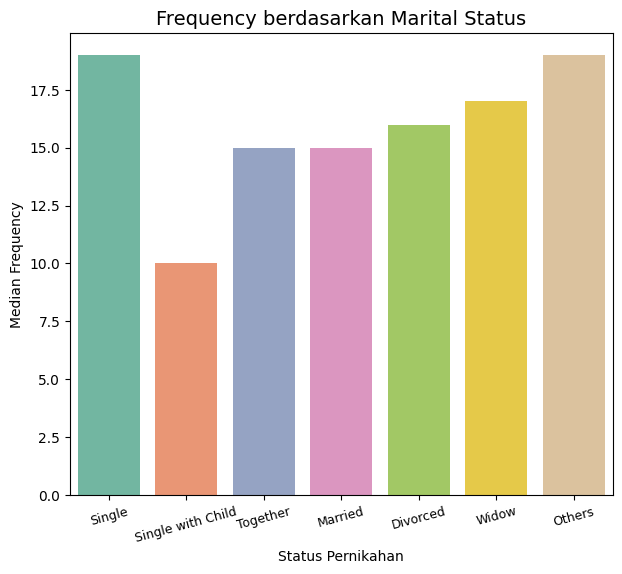

In [595]:
plt.figure(figsize=(7,6))

sns.barplot(
    data=df_clean,
    x='MaritalStatus',
    y='TotalTransactions',
    estimator='median',
    errorbar=None,
    palette='Set2',
    order=[
        'Single', 'Single with Child', 'Together', 'Married', 'Divorced',
       'Widow', 'Others'
    ]
)

plt.title('Frequency berdasarkan Marital Status', size=14)
plt.xlabel('Status Pernikahan', size=10)
plt.ylabel('Median Frequency', size=10)
plt.xticks(rotation=15, size=9)
plt.show()

- Terdapat perbedaan antara rata-rata frequency pada tiap kategori status pernikahan.

### Apakah ada perbedaan secara signifikan antara rata-rata/median frequency berdasarkan kategori status pernikahan?

Hipotesis:

- H0 = Tidak terdapat perbedaan yang signifikan pada median frequency antar tiap kategori status pernikahan.
- H1 = Setidaknya terdapat satu tingkat pendidikan yang memiliki median frequency yang berbeda secara signifikan dibandingkan kategori status pernikahan lainnya.

In [596]:
stat_kruskal, pval_kruskal = kruskal(
    df_clean[df_clean['MaritalStatus'] == 'Single']['TotalTransactions'],
    df_clean[df_clean['MaritalStatus'] == 'Single with Child']['TotalTransactions'],
    df_clean[df_clean['MaritalStatus'] == 'Together']['TotalTransactions'],
    df_clean[df_clean['MaritalStatus'] == 'Married']['TotalTransactions'],
    df_clean[df_clean['MaritalStatus'] == 'Divorced']['TotalTransactions'],
    df_clean[df_clean['MaritalStatus'] == 'Widow']['TotalTransactions'],
    df_clean[df_clean['MaritalStatus'] == 'Others']['TotalTransactions']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Setidaknya terdapat satu kategori status pernikahan dengan median frequency berbeda secara signifikan dengan kategori status pernikahan lain.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan median frequency yang signifikan antar kategori status pernikahan.")


Tolak H0, Setidaknya terdapat satu kategori status pernikahan dengan median frequency berbeda secara signifikan dengan kategori status pernikahan lain.


#### **4. Income Level vs Frequency**

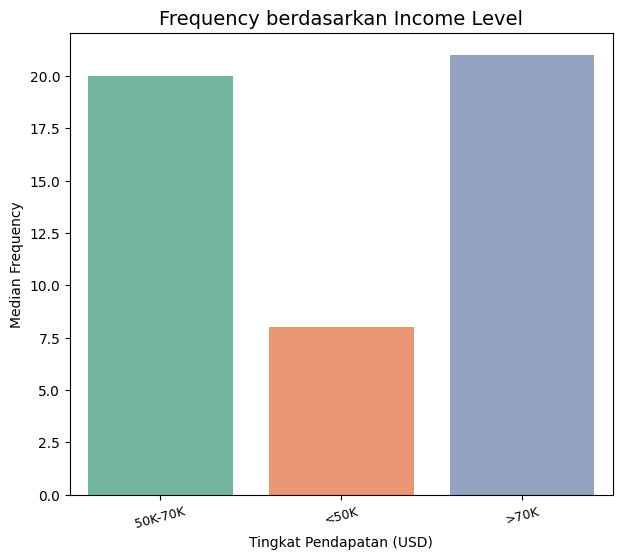

In [597]:
plt.figure(figsize=(7,6))

sns.barplot(
    data=df_clean,
    x='IncomeCategory',
    y='TotalTransactions',
    estimator='median',
    errorbar=None,
    palette='Set2',
    order=[
        '50K-70K', '<50K', '>70K'
    ]
)

plt.title('Frequency berdasarkan Income Level', size=14)
plt.xlabel('Tingkat Pendapatan (USD)', size=10)
plt.ylabel('Median Frequency', size=10)
plt.xticks(rotation=15, size=9)
plt.show()

- Terdapat perbedaan antara rata-rata frequency pada tiap tingkat pendapatan.

### Apakah ada perbedaan secara signifikan antara rata-rata/median recency berdasarkan kategori tingkat pendapatan?

Hipotesis:

- H0 = Tidak terdapat perbedaan yang signifikan pada median frequency antar kategori tingkat pendapatan.
- H1 = Setidaknya terdapat satu tingkat pendidikan yang memiliki median frequency yang berbeda secara signifikan dibandingkan kategori tingkat pendapatan lain.

In [598]:
stat_kruskal, pval_kruskal = kruskal(
    df_clean[df_clean['IncomeCategory'] == '<50K']['TotalTransactions'],
    df_clean[df_clean['IncomeCategory'] == '50K-70K']['TotalTransactions'],
    df_clean[df_clean['IncomeCategory'] == '>70K']['TotalTransactions']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Setidaknya terdapat satu kategori tingkat pendapatan dengan median frequency berbeda secara signifikan dengan kategori tingkat pendapatan lain.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan median frequency yang signifikan antar kategori tingkat pendapatan.")

Tolak H0, Setidaknya terdapat satu kategori tingkat pendapatan dengan median frequency berbeda secara signifikan dengan kategori tingkat pendapatan lain.


**Terdapat perbedaan signifikan antara Frequency pada tiap kategori usia, tingkat pendidikan, status pernikahan dan tingkat pendapatan.**

### **Analisis Pola Perilaku Pelanggan Berdasarkan Monetary (Total Spending)**

#### **1. Age Category vs Monetary**

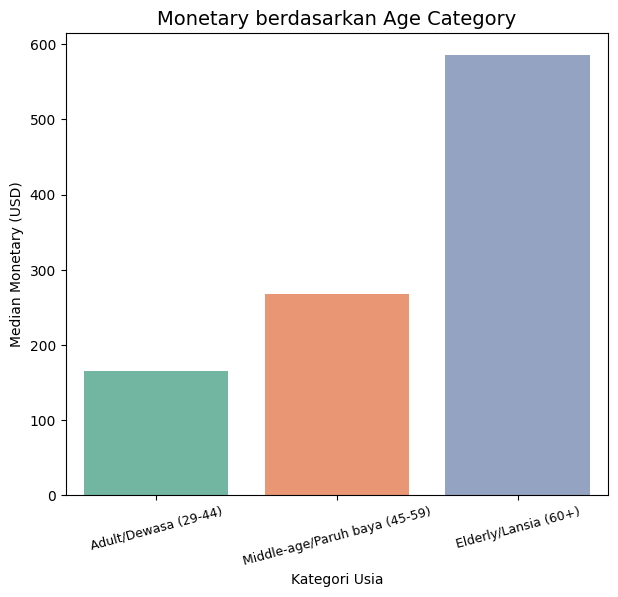

In [599]:
plt.figure(figsize=(7,6))

sns.barplot(
    data=df_clean,
    x='AgeCategory',
    y='TotalSpending',
    estimator='median',
    errorbar=None,
    palette='Set2',
    order=[
        'Adult/Dewasa (29-44)', 
        'Middle-age/Paruh baya (45-59)', 
        'Elderly/Lansia (60+)'
    ]
)

plt.title('Monetary berdasarkan Age Category', size=14)
plt.xlabel('Kategori Usia', size=10)
plt.ylabel('Median Monetary (USD)', size=10)
plt.xticks(rotation=15, size=9)
plt.show()

- Terdapat perbedaan antara rata-rata monetary pada tiap kategori usia.

### Apakah ada perbedaan secara signifikan antara rata-rata/median monetary berdasarkan kategori usia?

Hipotesis:

- H0 = Tidak terdapat perbedaan yang signifikan pada median monetary antar tiap kategori usia.
- H1 = Setidaknya terdapat satu kategori usia yang memiliki median monetary yang berbeda secara signifikan dibandingkan kategori usia lainnya.

In [600]:
stat_kruskal, pval_kruskal = kruskal(
    df_clean[df_clean['AgeCategory'] == 'Adult/Dewasa (29-44)']['TotalSpending'],
    df_clean[df_clean['AgeCategory'] == 'Middle-age/Paruh baya (45-59)']['TotalSpending'],
    df_clean[df_clean['AgeCategory'] == 'Elderly/Lansia (60+)']['TotalSpending']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Setidaknya terdapat satu kategori usia yang memiliki median monetary yang berbeda secara signifikan dibandingkan kategori usia lain.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan yang signifikan pada median monetary antar tiap kategori usia.")

Tolak H0, Setidaknya terdapat satu kategori usia yang memiliki median monetary yang berbeda secara signifikan dibandingkan kategori usia lain.


#### **2. Education vs Monetary**

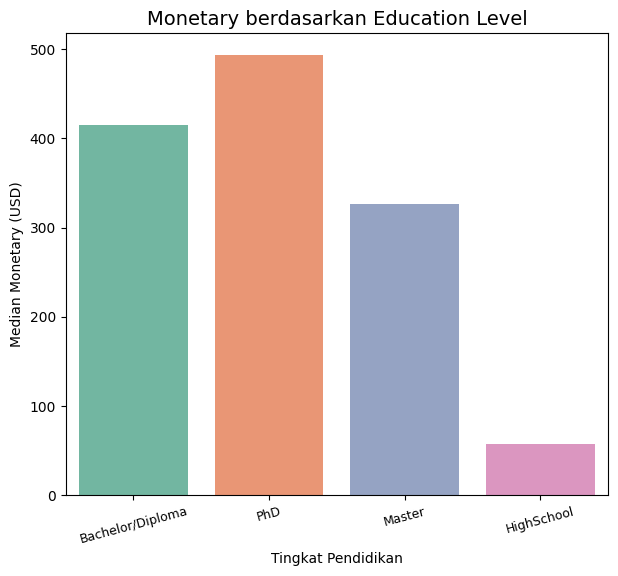

In [601]:
plt.figure(figsize=(7,6))

sns.barplot(
    data=df_clean,
    x='Education',
    y='TotalSpending',
    estimator='median',
    errorbar=None,
    palette='Set2',
    order=[
        'Bachelor/Diploma', 'PhD', 'Master', 'HighSchool'
    ]
)

plt.title('Monetary berdasarkan Education Level', size=14)
plt.xlabel('Tingkat Pendidikan', size=10)
plt.ylabel('Median Monetary (USD)', size=10)
plt.xticks(rotation=15, size=9)
plt.show()

- Terdapat perbedaan antara rata-rata monetary pada tiap tingkat pendidikan.

### Apakah ada perbedaan secara signifikan antara rata-rata/median monetary berdasarkan tingkat pendidikan?

Hipotesis:

- H0 = Tidak terdapat perbedaan yang signifikan pada median monetary antar tingkat pendidikan.
- H1 = Setidaknya terdapat satu tingkat pendidikan yang memiliki median monetary yang berbeda secara signifikan dibandingkan tingkat pendidikan lainnya.

In [602]:
stat_kruskal, pval_kruskal = kruskal(
    df_clean[df_clean['Education'] == 'Bachelor/Diploma']['TotalSpending'],
    df_clean[df_clean['Education'] == 'Master']['TotalSpending'],
    df_clean[df_clean['Education'] == 'PhD']['TotalSpending'],
    df_clean[df_clean['Education'] == 'HighSchool']['TotalSpending']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Setidaknya terdapat satu tingkat pendidikan yang memiliki median monetary yang berbeda secara signifikan dibandingkan tingkat pendidikan lain.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan yang signifikan pada median monetary antar tingkat pendidikan.")

Tolak H0, Setidaknya terdapat satu tingkat pendidikan yang memiliki median monetary yang berbeda secara signifikan dibandingkan tingkat pendidikan lain.


#### **3. Marital Status vs Monetary**

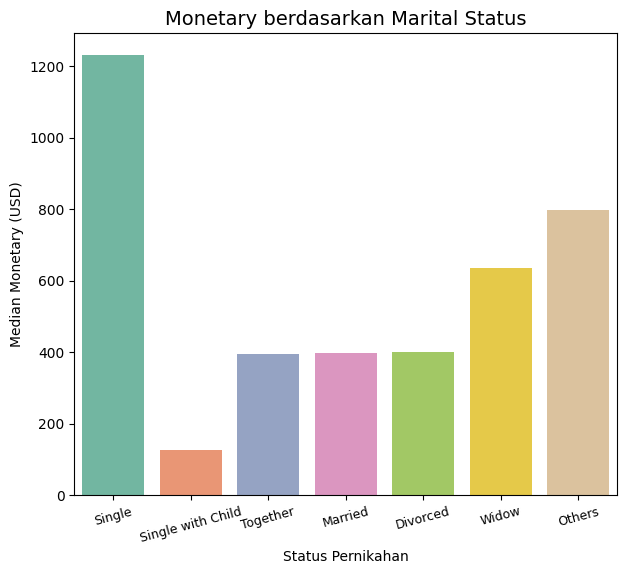

In [603]:
plt.figure(figsize=(7,6))

sns.barplot(
    data=df_clean,
    x='MaritalStatus',
    y='TotalSpending',
    estimator='median',
    errorbar=None,
    palette='Set2',
    order=[
        'Single', 'Single with Child', 'Together', 'Married', 'Divorced',
       'Widow', 'Others'
    ]
)

plt.title('Monetary berdasarkan Marital Status', size=14)
plt.xlabel('Status Pernikahan', size=10)
plt.ylabel('Median Monetary (USD)', size=10)
plt.xticks(rotation=15, size=9)
plt.show()

- Terdapat perbedaan antara rata-rata monetary pada tiap kategori status pernikahan.

### Apakah ada perbedaan secara signifikan antara rata-rata/median monetary berdasarkan kategori status pernikahan?

Hipotesis:

- H0 = Tidak terdapat perbedaan yang signifikan pada median frequency antar tiap kategori status pernikahan.
- H1 = Setidaknya terdapat satu tingkat pendidikan yang memiliki median frequency yang berbeda secara signifikan dibandingkan kategori status pernikahan lainnya.

In [604]:
stat_kruskal, pval_kruskal = kruskal(
    df_clean[df_clean['MaritalStatus'] == 'Single']['TotalSpending'],
    df_clean[df_clean['MaritalStatus'] == 'Single with Child']['TotalSpending'],
    df_clean[df_clean['MaritalStatus'] == 'Together']['TotalSpending'],
    df_clean[df_clean['MaritalStatus'] == 'Married']['TotalSpending'],
    df_clean[df_clean['MaritalStatus'] == 'Divorced']['TotalSpending'],
    df_clean[df_clean['MaritalStatus'] == 'Widow']['TotalSpending'],
    df_clean[df_clean['MaritalStatus'] == 'Others']['TotalSpending']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Setidaknya terdapat satu kategori status pernikahan dengan median monetary berbeda secara signifikan dengan kategori status pernikahan lain.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan median monetary yang signifikan antar kategori status pernikahan.")

Tolak H0, Setidaknya terdapat satu kategori status pernikahan dengan median monetary berbeda secara signifikan dengan kategori status pernikahan lain.


#### **4. Income Level vs Monetary**

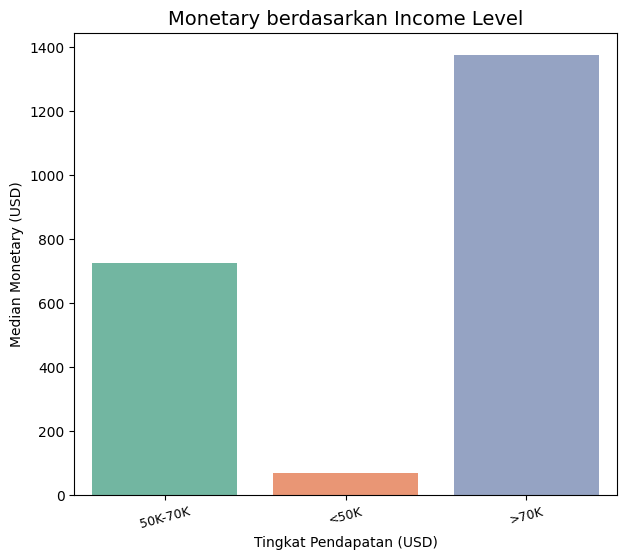

In [605]:
plt.figure(figsize=(7,6))

sns.barplot(
    data=df_clean,
    x='IncomeCategory',
    y='TotalSpending',
    estimator='median',
    errorbar=None,
    palette='Set2',
    order=[
        '50K-70K', '<50K', '>70K'
    ]
)

plt.title('Monetary berdasarkan Income Level', size=14)
plt.xlabel('Tingkat Pendapatan (USD)', size=10)
plt.ylabel('Median Monetary (USD)', size=10)
plt.xticks(rotation=15, size=9)
plt.show()

- Terdapat perbedaan antara rata-rata monetary pada tiap tingkat pendapatan.

### Apakah ada perbedaan secara signifikan antara rata-rata/median monetary berdasarkan kategori tingkat pendapatan?

Hipotesis:

- H0 = Tidak terdapat perbedaan yang signifikan pada median monetary antar kategori tingkat pendapatan.
- H1 = Setidaknya terdapat satu tingkat pendidikan yang memiliki median monetary yang berbeda secara signifikan dibandingkan kategori tingkat pendapatan lain.

In [606]:
stat_kruskal, pval_kruskal = kruskal(
    df_clean[df_clean['IncomeCategory'] == '<50K']['TotalSpending'],
    df_clean[df_clean['IncomeCategory'] == '50K-70K']['TotalSpending'],
    df_clean[df_clean['IncomeCategory'] == '>70K']['TotalSpending']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Setidaknya terdapat satu kategori tingkat pendapatan dengan median frequency berbeda secara signifikan dengan kategori tingkat pendapatan lain.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan median frequency yang signifikan antar kategori tingkat pendapatan.")

Tolak H0, Setidaknya terdapat satu kategori tingkat pendapatan dengan median frequency berbeda secara signifikan dengan kategori tingkat pendapatan lain.


**Terdapat perbedaan signifikan antara Monetary pada tiap kategori usia, tingkat pendidikan, status pernikahan dan tingkat pendapatan.**

- Recency tidak berbeda signifikan antar segmen demografi, namun Frequency dan Monetary dipengaruhi oleh kombinasi faktor demografi tertentu.
- Pelanggan high-frequency dan high-spending buyers dapat diidentifikasikan sebagai: Usia matang (Elderly dan Middle Age), Pendidikan tinggi (PhD, Bachelor, Master), Pendapatan tinggi >70K, dan berstatus Single.
- Hal ini logis dikarenakan pelanggan dengan pendapatan tinggi memiliki lebih banyak disposable income, pelanggan usia Middle Age dan Elderly cenderung memiliki pendapatan yang stabil, tingkat pendidikan tinggi berhubungan dengan penghasilan lebih besar, dan status Single memungkinkan pengeluaran yang lebih tinggi dan lebih sering belanja karena belum ada tanggungan keluarga.
- Kelompok pelanggan yang high-frequency buying dan high spending buyers ini sebaiknya menjadi fokus utama perusahaan.

## **Marketing Campaign Analysis**

In [607]:
campaign_cols = df_clean[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                          'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']]

# hitung jumlah accepted per campaign
campaign_sum = campaign_cols.sum()

# hitung total customer
total_customers = df_clean.shape[0]

# hitung persentase acceptance rate tiap campaign
campaign_percentage = ((campaign_sum / total_customers) * 100).round(1)

# buat DataFrame
campaign_summary = pd.DataFrame({
    'Campaign': campaign_sum.index,
    'Total Accepted': campaign_sum.values,
    'Acceptance Rate (%)': campaign_percentage.values
})

# Hitung persentase not accepted
campaign_summary['Rejection Rate (%)'] = (100 - campaign_summary['Acceptance Rate (%)']).round(1)

campaign_summary

,Campaign,Total Accepted,Acceptance Rate (%),Rejection Rate (%)
0,AcceptedCmp1,144,6.4,93.6
1,AcceptedCmp2,30,1.3,98.7
2,AcceptedCmp3,163,7.3,92.7
3,AcceptedCmp4,167,7.5,92.5
4,AcceptedCmp5,162,7.2,92.8
5,AcceptedCmp6,334,14.9,85.1


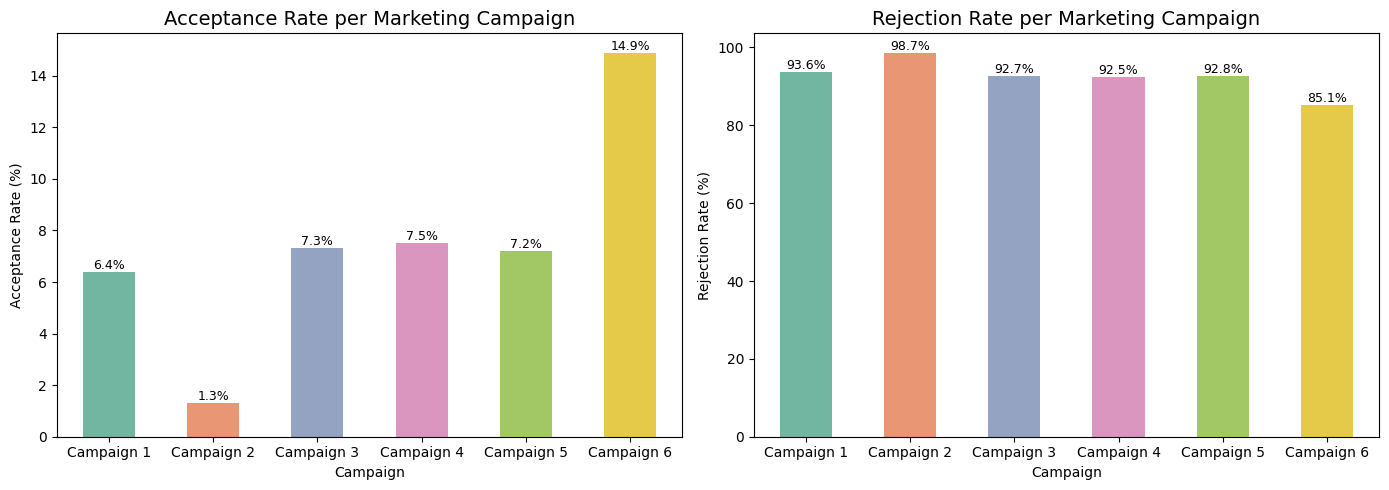

In [608]:
# Ambil warna dari palette Set2
colors = sns.color_palette("Set2", n_colors=6)

campaign_palette = dict(zip(
    campaign_summary['Campaign'],
    colors
))

plt.figure(figsize=(14,5))

# Subplot 1: Acceptance Rate 
plt.subplot(1, 2, 1)
bar_plot1 = sns.barplot(
    data=campaign_summary,
    x='Campaign',
    y='Acceptance Rate (%)',
    errorbar=None,
    palette=campaign_palette,
    width=0.5
)

for i in bar_plot1.containers:
    bar_plot1.bar_label(i, fmt='%.1f%%', size=9)

plt.title('Acceptance Rate per Marketing Campaign', size=14)
plt.xlabel('Campaign', size=10)
plt.ylabel('Acceptance Rate (%)', size=10)
plt.xticks(
    ticks=range(6),
    labels=['Campaign 1', 'Campaign 2', 'Campaign 3',
            'Campaign 4', 'Campaign 5', 'Campaign 6']
)

# Subplot 2: Rejection Rate
plt.subplot(1, 2, 2)
bar_plot2 = sns.barplot(
    data=campaign_summary,
    x='Campaign',
    y='Rejection Rate (%)',
    errorbar=None,
    palette=campaign_palette,
    width=0.5
)

for i in bar_plot2.containers:
    bar_plot2.bar_label(i, fmt='%.1f%%', size=9)

plt.title('Rejection Rate per Marketing Campaign', size=14)
plt.xlabel('Campaign', size=10)
plt.ylabel('Rejection Rate (%)', size=10)
plt.xticks(
    ticks=range(6),
    labels=['Campaign 1', 'Campaign 2', 'Campaign 3',
            'Campaign 4', 'Campaign 5', 'Campaign 6']
)

plt.tight_layout()
plt.show()

### **Recency vs Campaign Acceptance Respons**

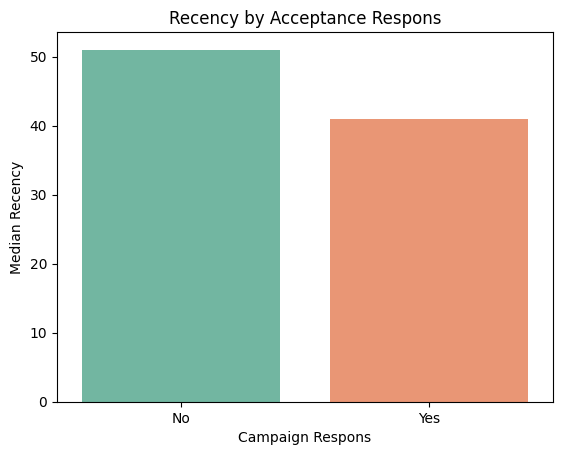

In [609]:
recency_acc_rate =df_clean[['Recency', 'AcceptedCampaign']].groupby('AcceptedCampaign')['Recency'].median().reset_index()
plt.title('Recency by Acceptance Respons')
sns.barplot(x='AcceptedCampaign',y='Recency', data=recency_acc_rate, palette='Set2')
plt.xlabel('Campaign Respons')
plt.ylabel('Median Recency')
plt.show()

- Pelanggan yang baru-baru ini bertransaksi cenderung menunjukkan respons penerimaan campaign dibanding yang sudah lama bertransaksi.

#### Apakah ada perbedaan secara signifikan antara median recency berdasarkan tiap respons terhadap campaign?

Hipotesis:

- H0 = Tidak terdapat perbedaan secara signifikan antara median recency berdasarkan tiap respons terhadap campaign.
- H1 = Terdapat perbedaan secara signifikan antara median recency berdasarkan tiap respons terhadap campaign.

In [610]:
stat_whitneyu, pval_whiteneyu = mannwhitneyu(
    df_clean[df_clean['AcceptedCampaign'] == 'Yes']['Recency'],
    df_clean[df_clean['AcceptedCampaign'] == 'No']['Recency']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Terdapat perbedaan secara signifikan antara median recency pada tiap respons terhadap campaign.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan secara signifikan antara median recency pada tiap respons terhadap campaign.")

Tolak H0, Terdapat perbedaan secara signifikan antara median recency pada tiap respons terhadap campaign.


Terdapat perbedaan signifikan antara median recency berdasarkan tiap respons terhadap campaign.

### **Frequency vs Campaign Acceptance Respons**

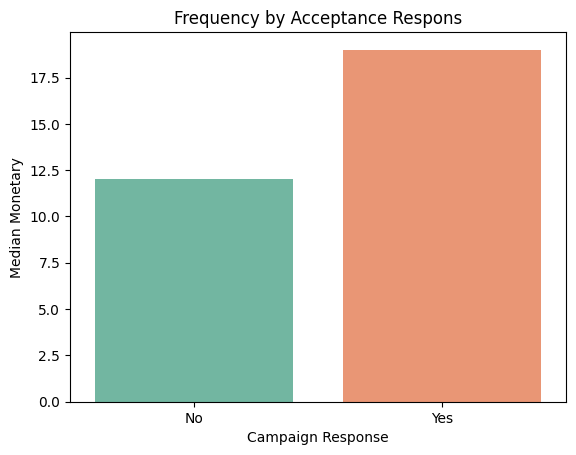

In [611]:
freq_acc_rate =df_clean[['TotalTransactions', 'AcceptedCampaign']].groupby('AcceptedCampaign')['TotalTransactions'].median().reset_index()
plt.title('Frequency by Acceptance Respons')
sns.barplot(x='AcceptedCampaign',y='TotalTransactions', data=freq_acc_rate, palette='Set2')
plt.xlabel('Campaign Response')
plt.ylabel('Median Monetary')
plt.show()

- Pelanggan yang lebih sering bertransaksi cenderung menunjukkan respons penerimaan campaign dibanding yang jarang bertransaksi.

#### Apakah ada perbedaan secara signifikan antara median frequency berdasarkan tiap respons terhadap campaign?

Hipotesis:

- H0 = Tidak terdapat perbedaan secara signifikan antara median frequency berdasarkan tiap respons terhadap campaign.
- H1 = Terdapat perbedaan secara signifikan antara median frequency berdasarkan tiap respons terhadap campaign.

In [612]:
stat_whitneyu, pval_whiteneyu = mannwhitneyu(
    df_clean[df_clean['AcceptedCampaign'] == 'Yes']['TotalTransactions'],
    df_clean[df_clean['AcceptedCampaign'] == 'No']['TotalTransactions']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Terdapat perbedaan secara signifikan antara median frequency pada tiap respons terhadap campaign.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan secara signifikan antara median frequency pada tiap respons terhadap campaign.")


Tolak H0, Terdapat perbedaan secara signifikan antara median frequency pada tiap respons terhadap campaign.


Terdapat perbedaan signifikan antara median frequency berdasarkan tiap respons terhadap campaign.

### **Monetary vs Campaign Acceptance Respons**

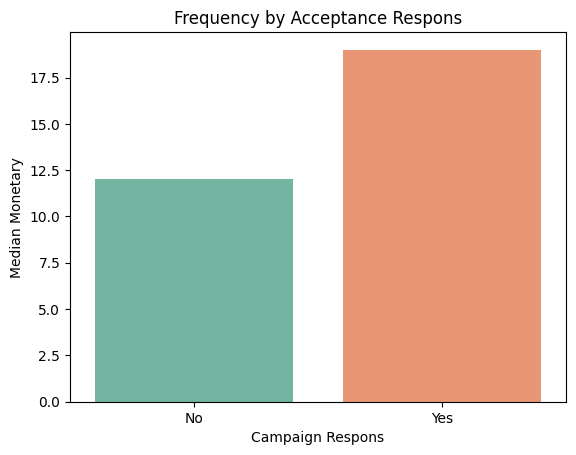

In [613]:
mon_acc_rate =df_clean[['TotalSpending', 'AcceptedCampaign']].groupby('AcceptedCampaign')['TotalSpending'].median().reset_index()
plt.title('Frequency by Acceptance Respons')
sns.barplot(x='AcceptedCampaign',y='TotalTransactions', data=freq_acc_rate, palette='Set2')
plt.xlabel('Campaign Respons')
plt.ylabel('Median Monetary')
plt.show()

- Pelanggan yang total spendingnya lebih besar, cenderung menunjukkan respons penerimaan campaign dibanding yang total spendingnya rendah.

#### Apakah ada perbedaan secara signifikan antara median monetary berdasarkan tiap respons terhadap campaign?

Hipotesis:

- H0 = Tidak terdapat perbedaan secara signifikan antara median monetary berdasarkan tiap respons terhadap campaign.
- H1 = Terdapat perbedaan secara signifikan antara median monetary berdasarkan tiap respons terhadap campaign. 

In [614]:
stat_whitneyu, pval_whiteneyu = mannwhitneyu(
    df_clean[df_clean['AcceptedCampaign'] == 'Yes']['TotalSpending'],
    df_clean[df_clean['AcceptedCampaign'] == 'No']['TotalSpending']
)

if pval_kruskal < 0.05:
    print("Tolak H0, Terdapat perbedaan secara signifikan antara median frequency pada tiap respons terhadap campaign.")
else:
    print("Gagal menolak H0, Tidak terdapat perbedaan secara signifikan antara median frequency pada tiap respons terhadap campaign.")

Tolak H0, Terdapat perbedaan secara signifikan antara median frequency pada tiap respons terhadap campaign.


Terdapat perbedaan signifikan antara median monetary berdasarkan tiap respons terhadap campaign.

Dari analisis, insight yang didapatkan:
- Pelanggan dengan recency rendah (baru bertransaksi), frequency tinggi (sering bertransaksi), dan monetary tinggi (total pengeluaran besar) cenderung lebih responsif terhadap campaign dibandingkan pelanggan yang memiliki karakteristik sebaliknya.

### **Marketing Campaign Acceptance Rate**

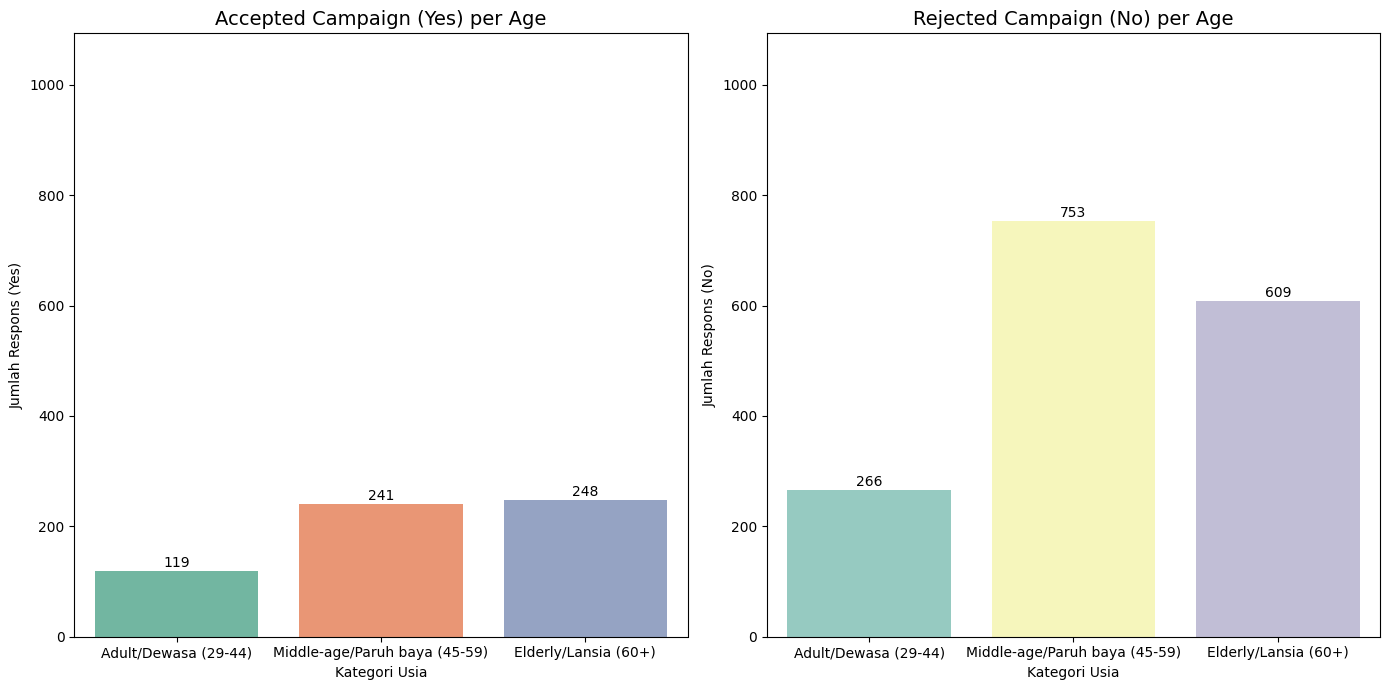

In [615]:
# Ubah kolom AcceptedCampaign berbentuk 0/1
df_clean['AcceptedCampaignNum'] = df_clean['AcceptedCampaign'].map({'Yes': 1, 'No': 0})

# Tentukan urutan kategori usia
age_order = [
    'Adult/Dewasa (29-44)',
    'Middle-age/Paruh baya (45-59)',
    'Elderly/Lansia (60+)'
]

# Hitung jumlah Yes per kategori usia
yes_by_age = df_clean.groupby('AgeCategory')['AcceptedCampaignNum'].sum().reindex(age_order)

# Hitung jumlah No per kategori usia
total_by_age = df_clean['AgeCategory'].value_counts().reindex(age_order)
no_by_age = total_by_age - yes_by_age

# Buat figure dengan 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14,7))

# Subplot Kiri: Accepted (Yes) 
sns.barplot(x=yes_by_age.index, y=yes_by_age.values, palette='Set2', ax=axes[0])
axes[0].set_title('Accepted Campaign (Yes) per Age', size=14)
axes[0].set_xlabel('Kategori Usia')
axes[0].set_ylabel('Jumlah Respons (Yes)')
axes[0].set_ylim(0, max(total_by_age.values)*1.1)

# Tambahkan label di atas bar
for i, val in enumerate(yes_by_age.values):
    axes[0].text(i, val + 2, int(val), ha='center', va='bottom', fontsize=10)

# Subplot Kanan: Rejected (No)
sns.barplot(x=no_by_age.index, y=no_by_age.values, palette='Set3', ax=axes[1])
axes[1].set_title('Rejected Campaign (No) per Age', size=14)
axes[1].set_xlabel('Kategori Usia')
axes[1].set_ylabel('Jumlah Respons (No)')
axes[1].set_ylim(0, max(total_by_age.values)*1.1)

# Tambahkan label di atas bar
for i, val in enumerate(no_by_age.values):
    axes[1].text(i, val + 2, int(val), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

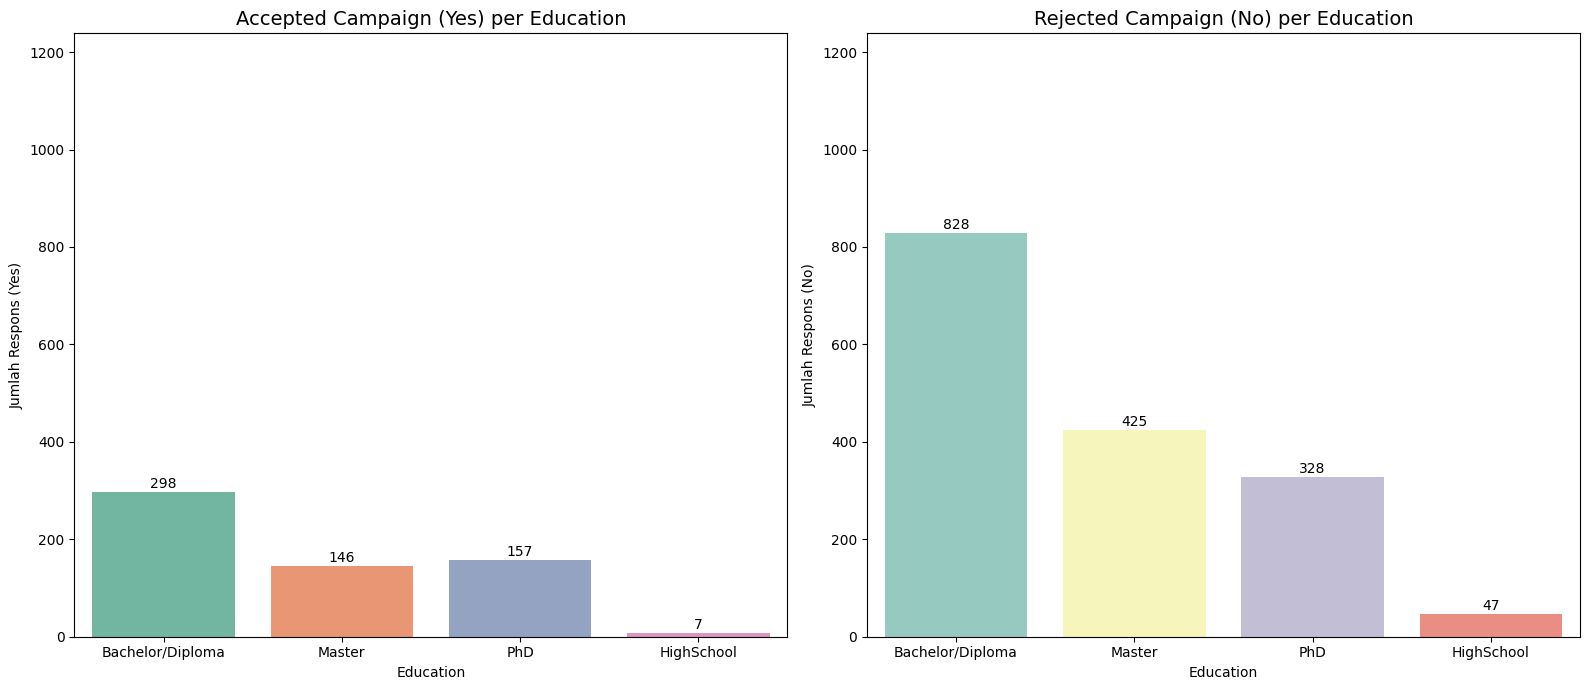

In [616]:
# Tentukan urutan kategori Education
edu_order = df_clean['Education'].value_counts().index

# Hitung jumlah Yes
yes_by_edu = df_clean.groupby('Education')['AcceptedCampaignNum'].sum().reindex(edu_order)

# Hitung jumlah No
total_by_edu = df_clean['Education'].value_counts().reindex(edu_order)
no_by_edu = total_by_edu - yes_by_edu

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16,7))

# Accepted
sns.barplot(x=yes_by_edu.index, y=yes_by_edu.values, palette='Set2', ax=axes[0])
axes[0].set_title('Accepted Campaign (Yes) per Education', size=14)
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Jumlah Respons (Yes)')
axes[0].set_ylim(0, max(total_by_edu.values)*1.1)

for i, val in enumerate(yes_by_edu.values):
    axes[0].text(i, val + 2, int(val), ha='center', va='bottom', fontsize=10)

# Rejected
sns.barplot(x=no_by_edu.index, y=no_by_edu.values, palette='Set3', ax=axes[1])
axes[1].set_title('Rejected Campaign (No) per Education', size=14)
axes[1].set_xlabel('Education')
axes[1].set_ylabel('Jumlah Respons (No)')
axes[1].set_ylim(0, max(total_by_edu.values)*1.1)

for i, val in enumerate(no_by_edu.values):
    axes[1].text(i, val + 2, int(val), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


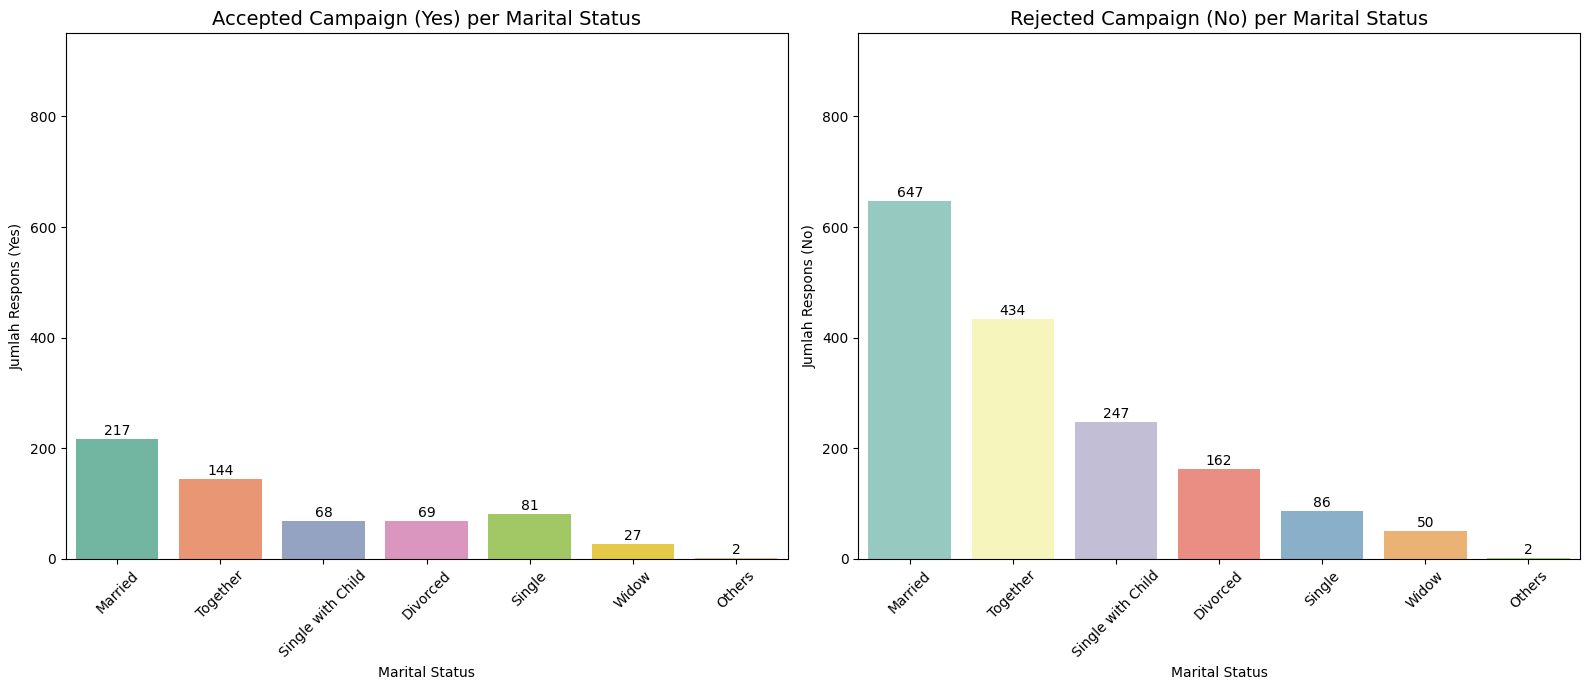

In [617]:
# Tentukan urutan kategori Marital Status
marital_order = df_clean['MaritalStatus'].value_counts().index

# Hitung jumlah Yes
yes_by_marital = df_clean.groupby('MaritalStatus')['AcceptedCampaignNum'].sum().reindex(marital_order)

# Hitung jumlah No
total_by_marital = df_clean['MaritalStatus'].value_counts().reindex(marital_order)
no_by_marital = total_by_marital - yes_by_marital

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16,7))

# Accepted
sns.barplot(x=yes_by_marital.index, y=yes_by_marital.values, palette='Set2', ax=axes[0])
axes[0].set_title('Accepted Campaign (Yes) per Marital Status', size=14)
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Jumlah Respons (Yes)')
axes[0].set_ylim(0, max(total_by_marital.values)*1.1)
axes[0].tick_params(axis='x', rotation=45)

for i, val in enumerate(yes_by_marital.values):
    axes[0].text(i, val + 2, int(val), ha='center', va='bottom', fontsize=10)

# Rejected
sns.barplot(x=no_by_marital.index, y=no_by_marital.values, palette='Set3', ax=axes[1])
axes[1].set_title('Rejected Campaign (No) per Marital Status', size=14)
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Jumlah Respons (No)')
axes[1].set_ylim(0, max(total_by_marital.values)*1.1)
axes[1].tick_params(axis='x', rotation=45)

for i, val in enumerate(no_by_marital.values):
    axes[1].text(i, val + 2, int(val), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

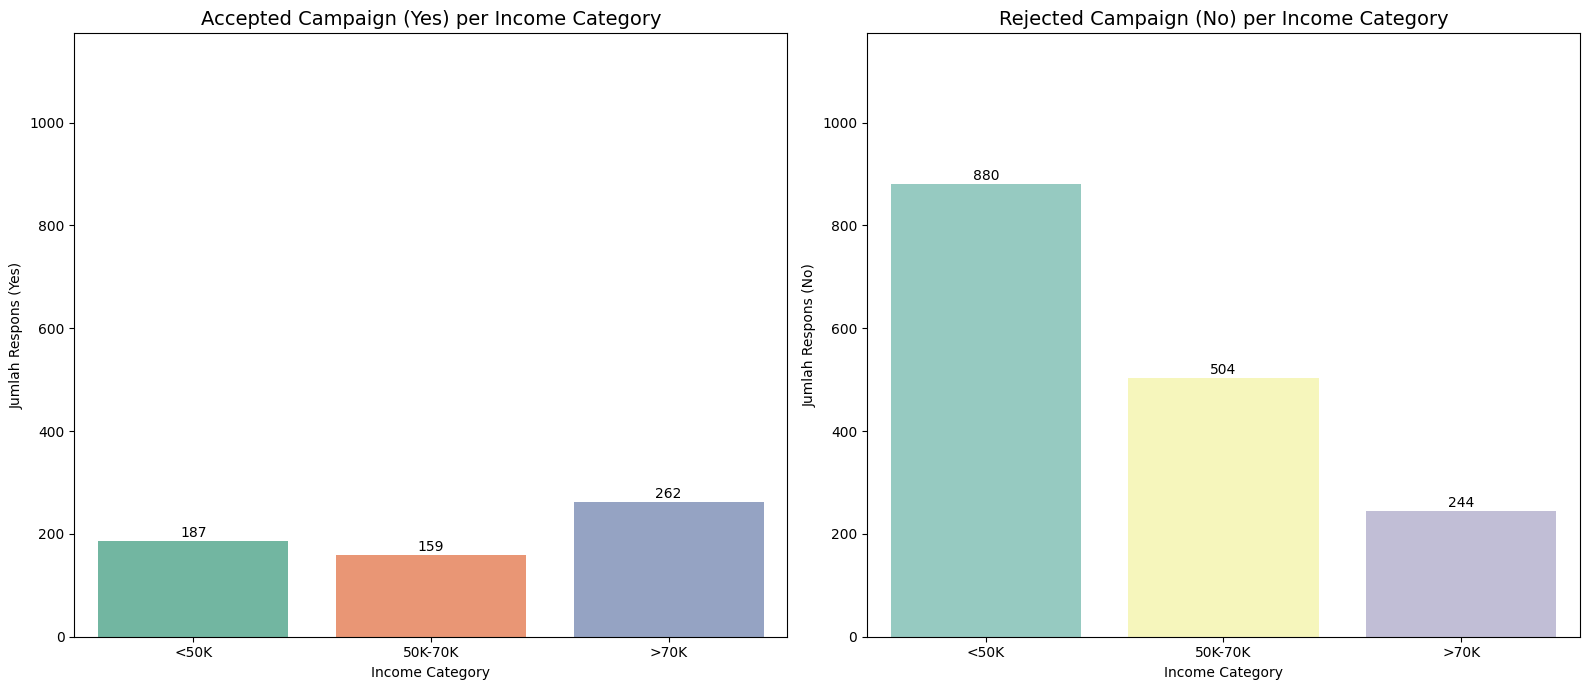

In [618]:
# Tentukan urutan kategori Income Category
income_order = df_clean['IncomeCategory'].value_counts().index

# Hitung jumlah Yes
yes_by_income = df_clean.groupby('IncomeCategory')['AcceptedCampaignNum'].sum().reindex(income_order)

# Hitung jumlah No
total_by_income = df_clean['IncomeCategory'].value_counts().reindex(income_order)
no_by_income = total_by_income - yes_by_income

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16,7))

# Accepted
sns.barplot(x=yes_by_income.index, y=yes_by_income.values, palette='Set2', ax=axes[0])
axes[0].set_title('Accepted Campaign (Yes) per Income Category', size=14)
axes[0].set_xlabel('Income Category')
axes[0].set_ylabel('Jumlah Respons (Yes)')
axes[0].set_ylim(0, max(total_by_income.values)*1.1)

for i, val in enumerate(yes_by_income.values):
    axes[0].text(i, val + 2, int(val), ha='center', va='bottom', fontsize=10)

# Rejected
sns.barplot(x=no_by_income.index, y=no_by_income.values, palette='Set3', ax=axes[1])
axes[1].set_title('Rejected Campaign (No) per Income Category', size=14)
axes[1].set_xlabel('Income Category')
axes[1].set_ylabel('Jumlah Respons (No)')
axes[1].set_ylim(0, max(total_by_income.values)*1.1)

for i, val in enumerate(no_by_income.values):
    axes[1].text(i, val + 2, int(val), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Insight berdasarkan tiap variabel terhadap respons penerimaan kampanye pemasaran:
- Usia: Elderly/Lansia dan Middle-age/Paruh baya paling responsif; Adult/Dewasa kurang responsif → kampanye untuk segmen muda perlu penyesuaian.
- Pendidikan: PhD, Bachelor/Diploma, dan Master paling responsif; pelanggan dengan pendidikan rendah cenderung memiliki income lebih rendah dan respons lebih rendah.
- Status Pernikahan: Married dan Together (Berpasangan) dan Single (dengan atau tanpa anak) adalah yang paling responsif secara berurutan → pasangan dan single cenderung lebih responsif terhadap kampanye.
- Income: >70K paling responsif, namun kenaikan income tidak selalu menaikkan respons → segmentasi berbasis income saja kurang cukup, perlu digabung dengan perilaku pelanggan.
- Target Pelanggan Baru: Fokus pada kombinasi segmen respons tinggi (Elderly/Middle Age + High Education + Berpasangan + High Income).
- Pelanggan Lama: Sesuaikan strategi perlakuan dan strategi kampanye per segmen untuk meningkatkan respons dan retensi pelanggan.

### **Marketing Campaign Acceptance Respons based on Discount Purchase**

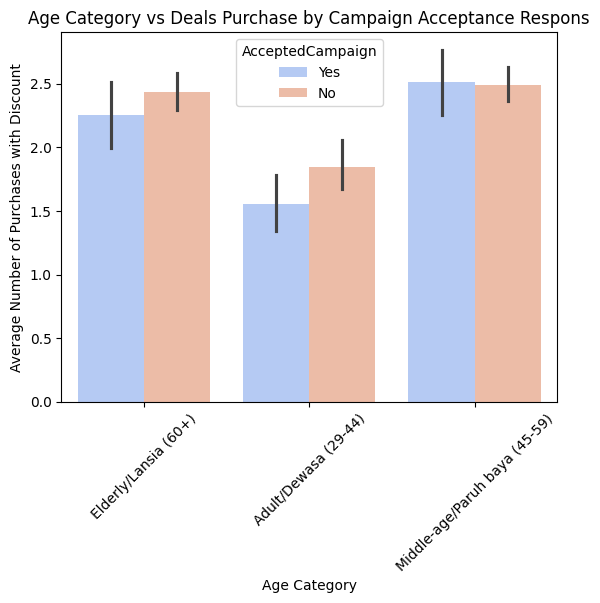

In [619]:
disc_by_age = df_clean.groupby('AgeCategory')['NumDealsPurchases'].mean().reset_index()

plt.title('Age Category vs Deals Purchase by Campaign Acceptance Respons')
sns.barplot(
    x='AgeCategory', 
    y='NumDealsPurchases', 
    hue='AcceptedCampaign', 
    data=df_clean, 
    palette='coolwarm',
    estimator=np.mean
)
plt.xlabel('Age Category')
plt.ylabel('Average Number of Purchases with Discount')
plt.xticks(rotation=45)
plt.show()

- Pembelian dengan diskon tidak memiliki dampak yang yang signifikan dengan penerimaan campaign. Frekuensi pembelian produk diskon tidak secara langsung meningkatkan penerimaan campaign.

## **Existing Customer Segmentation by RFM Analysis and Scoring**

Pada analisis ini, RFM scoring dilakukan berdasarkan nilai quantile karena beberapa alasan berikut:

- Beberapa penelitian/implementasi menggunakan quantile scoring untuk scoring RFM yang membuat segmentasi lebih balanced dan adaptif dibanding menggunakan treshold. [Source](https://www.researchgate.net/publication/382151690_CUSTOMER_SEGMENTATION_USING_RFM_ANALYSIS)

- Quantile-based scoring membantu menangani skewed distribution (nilai R, F, M yang tidak normal) karena lebih robust terhadap outlier, quantile tidak ditarik oleh nilai extreme outlier, lebih stabil dibanding average scoring. [Source](https://www.sciencedirect.com/science/article/pii/S2090447923001430?utm_source)

Pada data terdapat banyak outliers, oleh karena itu RFM Scoring berdasarkan nilai quantile.

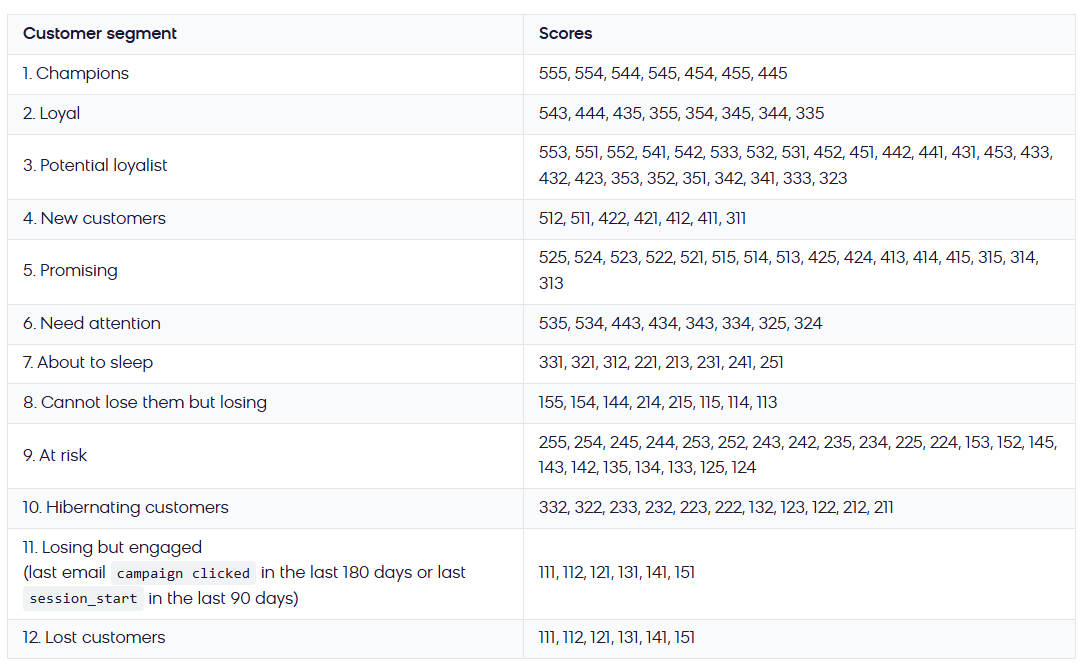

> Reference: [Segmentation by RFM](https://documentation.bloomreach.com/engagement/docs/rfm-segmentation)

In [620]:
segment = df_clean[['ID','TotalSpending', 'Recency', 'TotalTransactions']]

segment

,ID,TotalSpending,Recency,TotalTransactions
0,5524,1617,58,25
1,2174,27,38,6
2,4141,776,26,21
3,6182,53,26,8
4,5324,422,94,19
...,...,...,...,...
2235,10870,1341,46,18
2236,4001,444,56,22
2237,7270,1241,91,19
2238,8235,843,8,23


In [621]:
segment = segment.sort_values(by = ['TotalSpending', 'Recency', 'TotalTransactions'], ascending = False)

segment

,ID,TotalSpending,Recency,TotalTransactions
1179,5735,2525,29,18
1572,5350,2525,29,18
1492,1763,2524,62,29
987,4580,2486,46,26
1052,4475,2440,82,25
...,...,...,...,...
2129,10104,8,65,4
1420,5824,8,1,4
655,5555,6,81,0
981,3955,6,20,0


In [622]:
# 1. Skoring Manual RFM Berdasarkan Kuantil

# Recency: semakin kecil semakin baik
def r_score(x):
    if x <= df_clean['Recency'].quantile(0.2):
        return 5
    elif x <= df_clean['Recency'].quantile(0.4):
        return 4
    elif x <= df_clean['Recency'].quantile(0.6):
        return 3
    elif x <= df_clean['Recency'].quantile(0.8):
        return 2
    else:
        return 1

# Frequency: semakin besar semakin baik
def f_score(x):
    if x <= df_clean['TotalTransactions'].quantile(0.2):
        return 1
    elif x <= df_clean['TotalTransactions'].quantile(0.4):
        return 2
    elif x <= df_clean['TotalTransactions'].quantile(0.6):
        return 3
    elif x <= df_clean['TotalTransactions'].quantile(0.8):
        return 4
    else:
        return 5

# Monetary: semakin besar semakin baik
def m_score(x):
    if x <= df_clean['TotalSpending'].quantile(0.2):
        return 1
    elif x <= df_clean['TotalSpending'].quantile(0.4):
        return 2
    elif x <= df_clean['TotalSpending'].quantile(0.6):
        return 3
    elif x <= df_clean['TotalSpending'].quantile(0.8):
        return 4
    else:
        return 5

# 2. Apply Skor ke Tiap Pelanggan
df_clean['R_Score'] = df_clean['Recency'].apply(r_score)
df_clean['F_Score'] = df_clean['TotalTransactions'].apply(f_score)
df_clean['M_Score'] = df_clean['TotalSpending'].apply(m_score)

### **Combining R,F,M Score**

In [623]:
# Menambahkan RFM score
df_clean['RFM_Score'] = df_clean['R_Score'].astype(str) + df_clean['F_Score'].astype(str) + df_clean['M_Score'].astype(str)

df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalTransactions,AcceptedCampaignNum,R_Score,F_Score,M_Score,RFM_Score
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,1617,0,0,0,0,0,1,Yes,3,8,10,4,25,1,3,5,5,355
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,27,0,0,0,0,0,0,No,2,1,1,2,6,0,4,1,1,411
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,776,0,0,0,0,0,0,No,1,8,2,10,21,0,4,4,4,444
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,53,0,0,0,0,0,0,No,2,2,0,4,8,0,4,2,1,421
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,422,0,0,0,0,0,0,No,5,5,3,6,19,0,1,4,3,143


In [624]:
# mapping segment

segment_map = {
    "Champions": ["555","554","544","545","454","455","445"],
    
    "Loyal": ["543","444","435","355","354","345","344","335"],
    
    "Potential Loyalist": [
        "553","551","552","541","542","533","532","531",
        "452","451","442","441","431","453","433",
        "432","423","353","352","351","342","341","333","323"
    ],
    
    "New Customers": ["512","511","422","421","412","411","311"],
    
    "Promising": [
        "525","524","523","522","521","515","514","513",
        "425","424","413","414","415","315","314","313"
    ],
    
    "Need Attention": ["535","534","443","434","343","334","325","324"],
    
    "About to Sleep": ["331","321","312","221","213","231","241","251"],
    
    "Cannot Lose But Losing": ["155","154","144","214","215","115","114","113"],
    
    "At Risk": [
        "255","254","245","244","253","252","243","242",
        "235","234","225","224","153","152","145","143",
        "142","135","134","133","125","124"
    ],
    
    "Hibernating": [
        "332","322","233","232","223","222","132","123","122","212","211"
    ],
    
    "Lost": ["111","112","121","131","141","151"]
}

In [625]:
# Mapping segment berdasarkan RFM Score

def map_segment(score):
    score = str(score)
    for segment, scores in segment_map.items():
        if score in scores:
            return segment
    return "Other"

df_clean["Segment"] = df_clean["RFM_Score"].apply(map_segment)

df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalTransactions,AcceptedCampaignNum,R_Score,F_Score,M_Score,RFM_Score,Segment
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,1617,0,0,0,0,0,1,Yes,3,8,10,4,25,1,3,5,5,355,Loyal
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,27,0,0,0,0,0,0,No,2,1,1,2,6,0,4,1,1,411,New Customers
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,776,0,0,0,0,0,0,No,1,8,2,10,21,0,4,4,4,444,Loyal
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,53,0,0,0,0,0,0,No,2,2,0,4,8,0,4,2,1,421,New Customers
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,422,0,0,0,0,0,0,No,5,5,3,6,19,0,1,4,3,143,At Risk


### **Visualisasi Distribusi Segmen Pelanggan**

In [641]:
# tabel

summary_segment = (
    df_clean
    .groupby('Segment')['ID']
    .count()
    .reset_index(name='Count')
)

summary_segment['Percentage'] = (
    summary_segment['Count'] /
    summary_segment['Count'].sum() * 100
).round(2)

# Optional: urutkan dari terbesar
summary_segment = summary_segment.sort_values(
    by='Count',
    ascending=False
).reset_index(drop=True)

summary_segment

,Segment,Count,Percentage
0,New Customers,376,16.82
1,At Risk,369,16.50
2,Hibernating,320,14.31
3,Champions,253,11.31
4,Loyal,223,9.97
5,Potential Loyalist,203,9.08
6,Need Attention,126,5.64
7,Lost,125,5.59
8,Cannot Lose But Losing,116,5.19
9,Promising,73,3.26


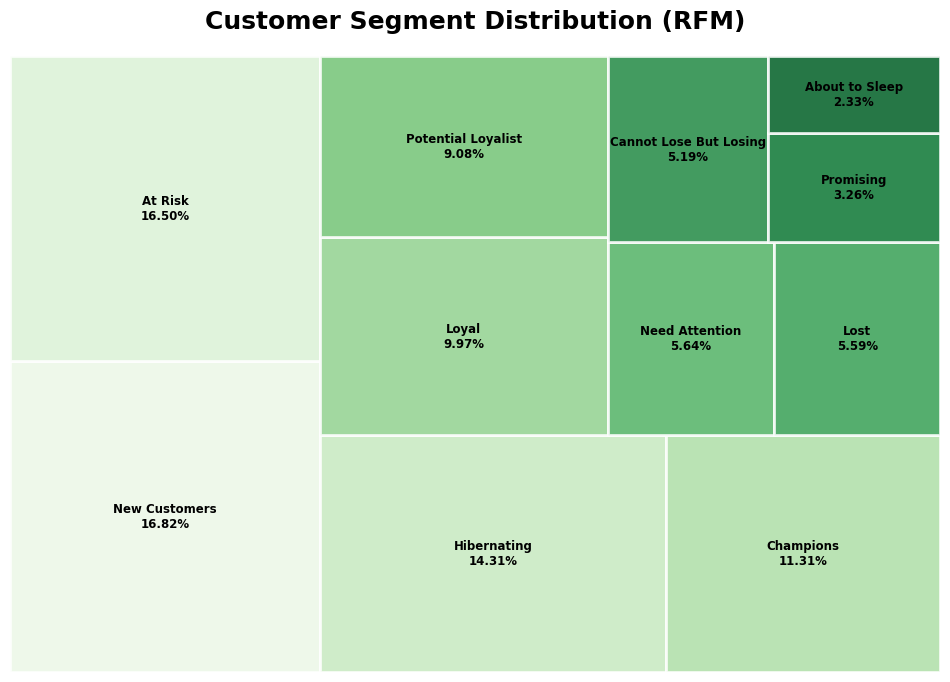

In [644]:
# Green color palette
colors = sns.color_palette("Greens", len(summary_segment))

plt.figure(figsize=(12, 8))

ax = squarify.plot(
    sizes=summary_segment['Count'],
    label=None,           
    color=colors,
    alpha=0.85,
    edgecolor='white',
    linewidth=2
)

# Tambahkan Segment + Percentage di tengah box
for i, patch in enumerate(ax.patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2

    segment = summary_segment.iloc[i]['Segment']
    percentage = summary_segment.iloc[i]['Percentage']

    plt.text(
        x, y,
        f"{segment}\n{percentage:.2f}%",
        ha='center',
        va='center',
        fontsize=8.5,
        fontweight='bold'
    )

plt.axis('off')
plt.title(
    'Customer Segment Distribution (RFM)',
    fontsize=18,
    fontweight='bold',
    pad=20
)

plt.show()

| **Nama Segment**                          | **Nilai RFM (R, F, M)**                            | **Kriteria Perilaku Pelanggan**                                                                                              |
| ----------------------------------------- | -------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **Champions**                             | R ≥ 4, F ≥ 4, M ≥ 4                                | Sangat aktif dan paling bernilai. Sering bertransaksi, recent/baru-baru ini bertransaksi, dan memiliki total belanja tinggi. Kontributor utama revenue. |
| **Loyal Customers**                       | R ≥ 3, F ≥ 4, M ≥ 3 (tidak termasuk Champions)     | Pelanggan rutin dengan frekuensi tinggi dan nilai belanja stabil. Loyal namun tidak seintens Champions.                      |
| **Potential Loyalist**                    | R ≥ 3, F ≥ 3, M ≥ 2                                | Cukup aktif dan memiliki potensi berkembang menjadi pelanggan loyal.                                                         |
| **New Customers**                         | R ≥ 4, F ≤ 2, M ≤ 2                                | Baru melakukan transaksi. Masih dalam tahap awal hubungan dengan bisnis.                                                     |
| **Promising**                             | R ≥ 4, F 2–3, M ≥ 3                                | Recent dan mulai menunjukkan nilai transaksi baik. Berpotensi naik kelas menjadi loyal.                                      |
| **Need Attention**                        | R = 3, F ≥ 3, M ≥ 3                                | Aktivitas mulai menurun dibanding sebelumnya, namun masih memiliki nilai transaksi yang cukup baik.                          |
| **About to Sleep**                        | R 2–3, F ≤ 2, M ≤ 2                                | Mulai jarang bertransaksi dan berisiko churn jika tidak ditindaklanjuti.                                                     |
| **Cannot Lose Them But Losing** | R ≤ 2, F ≥ 4 atau M ≥ 4                            | Pernah sangat bernilai tetapi sekarang sudah tidak recent. Prioritas tinggi untuk retensi dan menumbuhkan kembali engagement.                                   |
| **At Risk**                               | R ≤ 2, F ≥ 2 atau M ≥ 2                            | Aktivitas menurun tajam. Masih memiliki nilai historis tetapi risiko churn tinggi.                                           |
| **Hibernating Customers**                 | R ≤ 2, F ≤ 3, M ≤ 3                                | Sudah lama tidak aktif dengan nilai transaksi rendah-menengah.                   |  
| **Lost Customers**                        | R ≤ 2, F ≤ 2, M ≤ 2                                | Tidak aktif dan hampir tidak menunjukkan interaksi. Kemungkinan sudah churn sepenuhnya.                                      |


### **RFM Customer Segmentation Distribution:**

| **Segment**                     | **Persentase (%)** |
| ------------------------------- | ------------------ |
| **New customers**               | **16.82%**         |
| **At risk**                     | **16.50%**         |
| **Hibernating**                 | **14.31%**         |
| **Champions**                   | **11.31%**         |
| **Loyal**                       | **9.97%**          |
| **Potential loyalist**          | **9.08%**          |
| **Need attention**              | **5.64%**          |
| **Lost customers**              | **5.59%**          |
| **Cannot lose them but losing** | **5.19%**          |
| **Promising**                   | **3.26%**          |
| **About to sleep**              | **2.33%**          |

Berdasarkan analisis RFM, pelanggan segmen **Need Attention**, **About to sleep**, **Cannot Lose Them**, **At Risk** berpotensi turun level atau bahkan berisiko churn.

### **Distribusi Top Spenders pada tiap Segment RFM**

In [628]:
spenders = df_clean[['ID', 'IncomeCategory', 'MaritalStatus', 'Education', 'TotalSpending', 'Segment']]

spenders

# sort values dari yg total spendingnya terbesar

spenders_by_spending = spenders.sort_values(by = 'TotalSpending', ascending = False)

spenders_by_spending

,ID,IncomeCategory,MaritalStatus,Education,TotalSpending,Segment
1572,5350,>70K,Single,Master,2525,Champions
1179,5735,>70K,Single,Master,2525,Champions
1492,1763,>70K,Together,Bachelor/Diploma,2524,At Risk
987,4580,>70K,Married,Bachelor/Diploma,2486,Loyal
1052,4475,50K-70K,Married,PhD,2440,Cannot Lose But Losing
...,...,...,...,...,...,...
2129,10104,<50K,Together,Bachelor/Diploma,8,Hibernating
1245,6862,<50K,Divorced,Bachelor/Diploma,8,About to Sleep
655,5555,>70K,Divorced,Bachelor/Diploma,6,Lost
981,3955,<50K,Divorced,Bachelor/Diploma,6,New Customers


In [629]:
# ambil Top 30% Spender dan bulatkan ke atas untuk memastikan mengambil 30% data teratas

n_top = int(np.ceil(0.3 * len(spenders_by_spending)))

top_spenders = spenders_by_spending.head(n_top)

top_spenders

,ID,IncomeCategory,MaritalStatus,Education,TotalSpending,Segment
1572,5350,>70K,Single,Master,2525,Champions
1179,5735,>70K,Single,Master,2525,Champions
1492,1763,>70K,Together,Bachelor/Diploma,2524,At Risk
987,4580,>70K,Married,Bachelor/Diploma,2486,Loyal
1052,4475,50K-70K,Married,PhD,2440,Cannot Lose But Losing
...,...,...,...,...,...,...
1505,3643,50K-70K,Married,Master,928,At Risk
900,8624,>70K,Married,Bachelor/Diploma,928,At Risk
680,2891,50K-70K,Divorced,Bachelor/Diploma,928,Loyal
1254,5011,50K-70K,Divorced,Bachelor/Diploma,928,Loyal


In [630]:
df_clean['Segment_Spending'] = np.where(
    df_clean['ID'].isin(top_spenders['ID']),
    'Top Spender',
    'Non Top Spender'
)
df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalTransactions,AcceptedCampaignNum,R_Score,F_Score,M_Score,RFM_Score,Segment,Segment_Spending
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,1617,0,0,0,0,0,1,Yes,3,8,10,4,25,1,3,5,5,355,Loyal,Top Spender
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,27,0,0,0,0,0,0,No,2,1,1,2,6,0,4,1,1,411,New Customers,Non Top Spender
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,776,0,0,0,0,0,0,No,1,8,2,10,21,0,4,4,4,444,Loyal,Non Top Spender
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,53,0,0,0,0,0,0,No,2,2,0,4,8,0,4,2,1,421,New Customers,Non Top Spender
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,422,0,0,0,0,0,0,No,5,5,3,6,19,0,1,4,3,143,At Risk,Non Top Spender


In [631]:
revenue_top_spenders = top_spenders[['ID', 'IncomeCategory', 'TotalSpending']]

revenue_top_spenders

,ID,IncomeCategory,TotalSpending
1572,5350,>70K,2525
1179,5735,>70K,2525
1492,1763,>70K,2524
987,4580,>70K,2486
1052,4475,50K-70K,2440
...,...,...,...
1505,3643,50K-70K,928
900,8624,>70K,928
680,2891,50K-70K,928
1254,5011,50K-70K,928


In [632]:
# Hitung total spending secara keseluruhan (Revenue total)
total_spending_all = spenders_by_spending['TotalSpending'].sum()

# Hitung total spending Top 30% Spenders (Revenue dari Top 30% Spenders)
total_spending_top = revenue_top_spenders['TotalSpending'].sum()

# Hitung total spending Non Top Spenders (Revenue dari Non Top Spenders)
# Revenue dari Non Top Spenders = Revenue total - Revenue dari total spending Top 30% Spenders
total_spending_non_top = total_spending_all - total_spending_top

# Persentase Revenue dari Top 30% Spenders
percentage_top_revenue = (total_spending_top / total_spending_all) * 100

# Persentase Revenue dari Non Top Spenders
percentage_nontop_revenue = (total_spending_non_top/ total_spending_all) * 100

print(f"Top 30% Spenders berkontribusi sebesar {percentage_top_revenue :.1f}% dari total revenue.")
print(f"Non Top Spenders berkontribusi {percentage_nontop_revenue:.1f}% dari total revenue.")

Top 30% Spenders berkontribusi sebesar 69.6% dari total revenue.
Non Top Spenders berkontribusi 30.4% dari total revenue.


In [633]:
# dictionary untuk membuat DataFrame Revenue

revenue = {
    'Segment': ['Top 30% Spenders', 'Non-Top Spenders'],
    'Revenue': [total_spending_top, total_spending_non_top]
}

revenue

# Buat DataFrame Revenue
revenue_df = pd.DataFrame(revenue)

revenue_df['Percentage'] = (revenue_df['Revenue'] / revenue_df['Revenue'].sum()).round(3) * 100

revenue_df

,Segment,Revenue,Percentage
0,Top 30% Spenders,943107,69.6
1,Non-Top Spenders,411879,30.4


In [634]:
# Hitung jumlah top spender per segment
top_spenders_count = top_spenders.groupby('Segment')['TotalSpending'].count().reset_index()
top_spenders_count.rename(columns={'TotalSpending': 'Count'}, inplace=True)

# Persentase per segment (opsional)
top_spenders_count['Percentage'] = (top_spenders_count['Count'] / top_spenders_count['Count'].sum()) * 100

top_spenders_count

,Segment,Count,Percentage
0,At Risk,213,31.743666
1,Cannot Lose But Losing,65,9.687034
2,Champions,188,28.017884
3,Loyal,144,21.460507
4,Need Attention,59,8.792846
5,Promising,2,0.298063


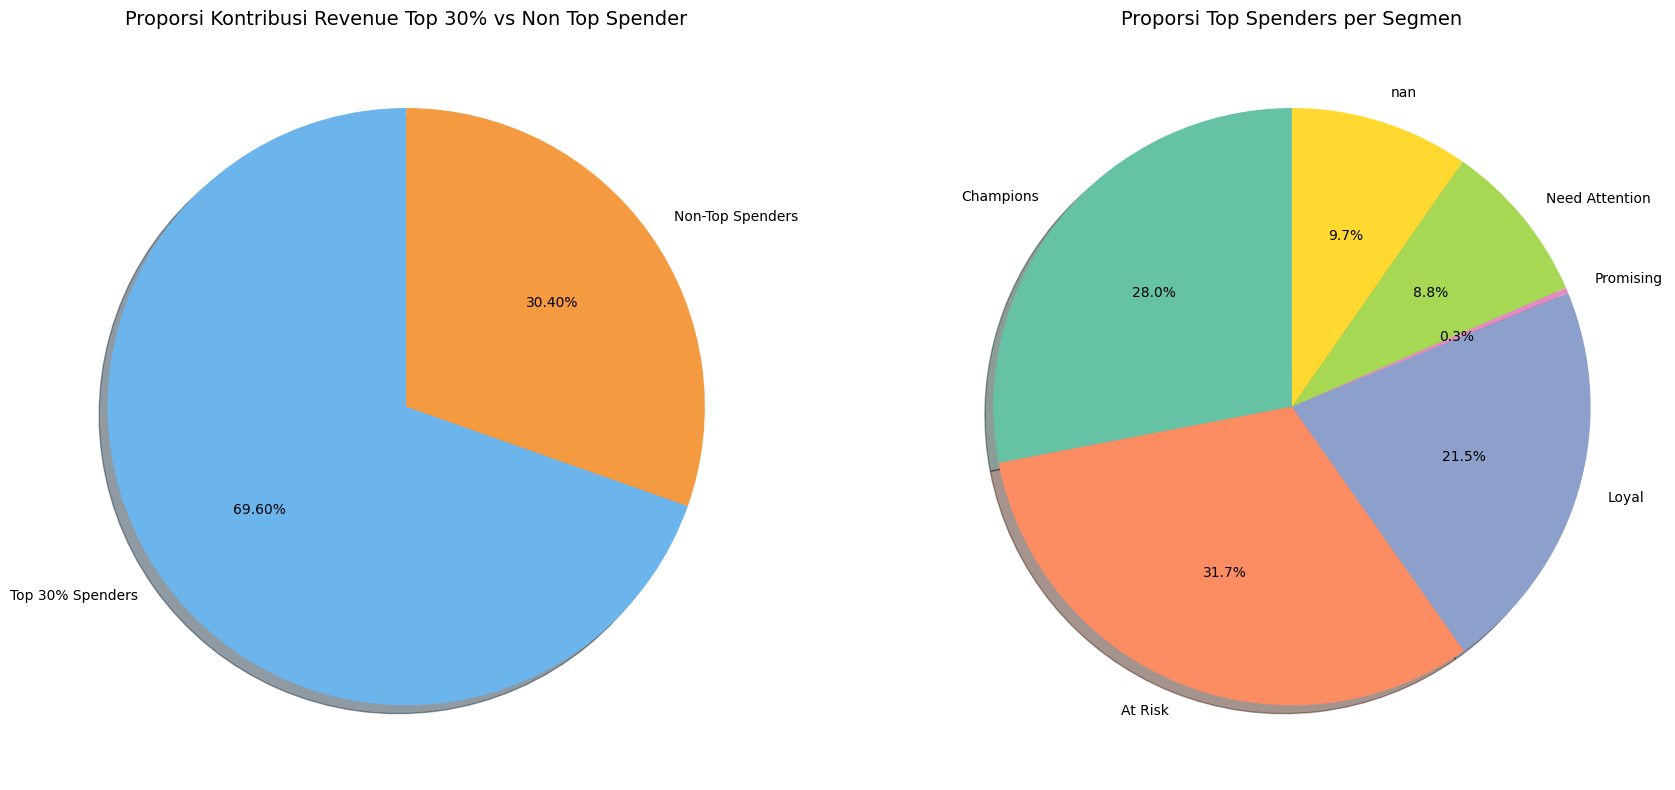

In [635]:
# Urutkan segment
segment_order = ['Champions','At Risk', 'Loyal', 'Potential Loyalist', 'New Customers',
                 'Promising', 'Need Attention', 'About to Sleep',
                 'Cannot Lose Them But Losing', 'Hibernating', 'Lost customers']

top_spenders_count['Segment'] = pd.Categorical(
    top_spenders_count['Segment'],
    categories=segment_order,
    ordered=True
)

top_spenders_count = top_spenders_count.sort_values('Segment')

# Warna untuk masing-masing chart
colors_segments = sns.color_palette("Set2", len(segment_order))
colors_revenue = ["#6cb5ec", "#f49b42"]

# Subplot
fig, axes = plt.subplots(1, 2, figsize=(18,8))

# Pie chart 1: Revenue contribution
axes[0].pie(
    x=revenue_df['Percentage'],
    labels=revenue_df['Segment'],
    autopct="%.2f%%",
    startangle=90,
    shadow=True,
    colors=colors_revenue
)
axes[0].set_title('Proporsi Kontribusi Revenue Top 30% vs Non Top Spender', fontsize=14)

# Pie chart 2: Top Spenders per Segment
axes[1].pie(
    x=top_spenders_count['Percentage'],
    labels=top_spenders_count['Segment'],
    autopct="%.1f%%",
    startangle=90,
    shadow=True,
    colors=colors_segments
)
axes[1].set_title('Proporsi Top Spenders per Segmen', fontsize=14)

plt.tight_layout()
plt.show()


- Top Spenders berkontribusi sebesar **~70% dari total revenue perusahaan**, mereka tidak hanya berasal dari **Champions (28%)** saja, tetapi juga dari **segmen Loyal (21,5%)**, **Promising (0.3%)**, **Needs Attention (8%)**, **Cannot Lose But Losing (9.7%)**, **At Risk (31.7%)**. 
- Oleh sebab itu, perlu untuk **menyusun strategi customer engagement yang berbeda pada tiap segmen RFM untuk meningkatkan retensi pelanggan** agar jangan sampai pelanggan Top Spenders yang jumlahnya besar pada segment RFM **Needs Attention**, **Cannot Lose But Losing** dan **At Risk** turun level atau bahkan sampai churn.

## **Marketing Campaign Acceptance Rate (RFM Segmentation)**

### **Respons Tiap Segment terhadap Campaign**

In [636]:
accept_campaign = df_clean[['Segment', 'AcceptedCampaign']].groupby('Segment')['AcceptedCampaign'].value_counts().reset_index(name='Count')

accept_campaign

,Segment,AcceptedCampaign,Count
0,About to Sleep,No,45
1,About to Sleep,Yes,7
2,At Risk,No,237
3,At Risk,Yes,132
4,Cannot Lose But Losing,No,77
5,Cannot Lose But Losing,Yes,39
6,Champions,No,129
7,Champions,Yes,124
8,Hibernating,No,282
9,Hibernating,Yes,38


In [637]:
accept_campaign['Percentage'] = (
    accept_campaign['Count'] / accept_campaign.groupby('Segment')['Count'].transform('sum') * 100
).round(2)

accept_campaign

,Segment,AcceptedCampaign,Count,Percentage
0,About to Sleep,No,45,86.54
1,About to Sleep,Yes,7,13.46
2,At Risk,No,237,64.23
3,At Risk,Yes,132,35.77
4,Cannot Lose But Losing,No,77,66.38
5,Cannot Lose But Losing,Yes,39,33.62
6,Champions,No,129,50.99
7,Champions,Yes,124,49.01
8,Hibernating,No,282,88.12
9,Hibernating,Yes,38,11.88


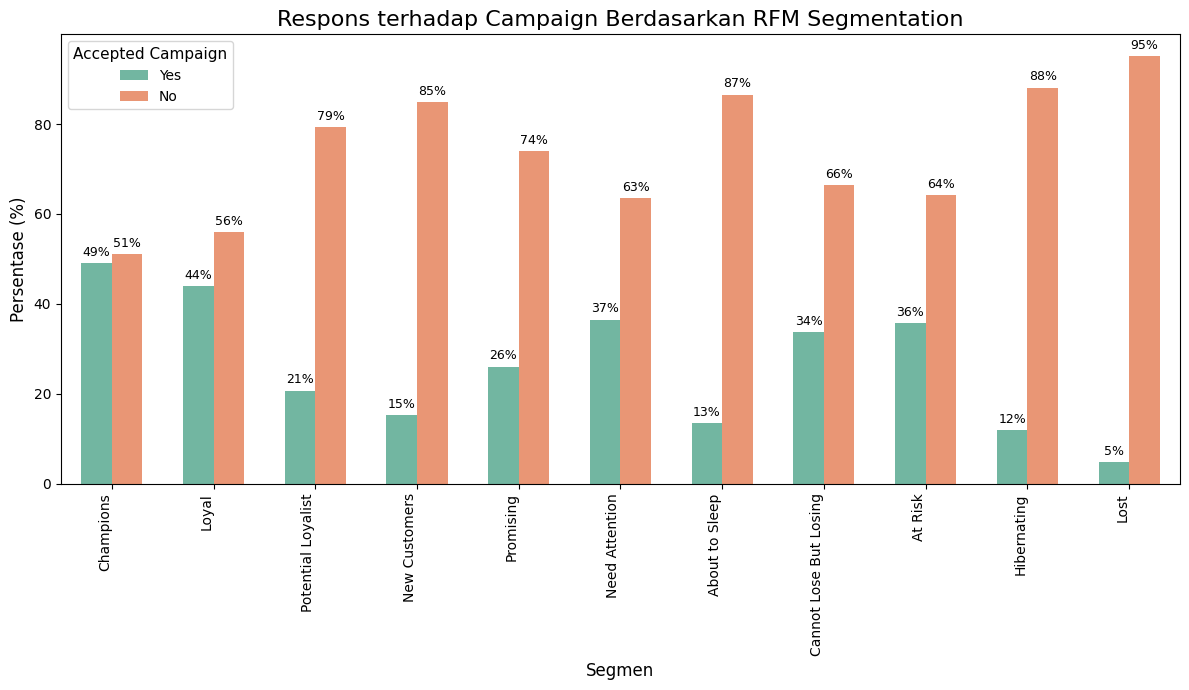

In [638]:
hue_order = ['Yes', 'No']

plt.figure(figsize=(12, 7))

bar_plot = sns.barplot(
    data=accept_campaign,
    x='Segment',
    y='Percentage',
    hue='AcceptedCampaign',
    hue_order=hue_order,
    errorbar=None,
    palette='Set2',
    width=0.6,
    order=[
        'Champions','Loyal','Potential Loyalist',
        'New Customers','Promising','Need Attention',
        'About to Sleep','Cannot Lose But Losing', 'At Risk',
        'Hibernating','Lost'
    ]
)

# Tambahkan label persentase
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.0f%%', padding=3, size=9)

plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title('Respons terhadap Campaign Berdasarkan RFM Segmentation',
          fontsize=16)

plt.xlabel('Segmen', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)

plt.legend(title='Accepted Campaign', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()

Respons tiap Segment RFM terhadap Campaign:

| Segment                    | Respons Yes (%) | Level Respons |
| -------------------------- | --------------- | ------------- |
| **Champions**              | 49%             | Paling Tinggi |
| **Loyal**                  | 44%             | Tinggi        |
| **Need Attention**         | 37%             | Cukup Tinggi  |
| **At Risk**                | 36%             | Cukup Tinggi  |
| **Cannot Lose But Losing** | 34%             | Sedang        |
| **Promising**              | 26%             | Rendah        |
| **Potential Loyalist**     | 21%             | Rendah        |
| **New Customers**          | 15%             | Sangat Rendah |
| **About to Sleep**         | 13%             | Sangat Rendah |
| **Hibernating**            | 12%             | Sangat Rendah |
| **Lost**                   | 5%              | Paling Rendah |

- 2 segmen paling profitable untuk campaign: **Champions dan Loyal**, sementara itu segmen lainnya memiliki campaign acceptance rate di bawah 40%.
- Respons campaign berbanding lurus dengan level engagement RFM pada level Segmen Top (Champion & Loyal) dan Segmen Bottom (About to Sleep, Hibernating dan Lost), tetapi tidak berbanding lurus pada Segment Middle karena segmen Middle Lowerr (Need Attention, At Risk, Cannot Lose But Losing) justru lebih responsif terhadap campaign dibanding segmen Middle Upper (Promising, Potential Loyalist dan New Customers)

In [639]:
df_clean.head()

,ID,Age,AgeCategory,Education,MaritalStatus,Income,IncomeCategory,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,AcceptedCampaign,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TotalTransactions,AcceptedCampaignNum,R_Score,F_Score,M_Score,RFM_Score,Segment,Segment_Spending
0,5524,68,Elderly/Lansia (60+),Bachelor/Diploma,Single,58138.0,50K-70K,0,0,58,635,88,546,172,88,88,1617,0,0,0,0,0,1,Yes,3,8,10,4,25,1,3,5,5,355,Loyal,Top Spender
1,2174,71,Elderly/Lansia (60+),Bachelor/Diploma,Single with Child,46344.0,<50K,1,1,38,11,1,6,2,1,6,27,0,0,0,0,0,0,No,2,1,1,2,6,0,4,1,1,411,New Customers,Non Top Spender
2,4141,60,Elderly/Lansia (60+),Bachelor/Diploma,Together,71613.0,>70K,0,0,26,426,49,127,111,21,42,776,0,0,0,0,0,0,No,1,8,2,10,21,0,4,4,4,444,Loyal,Non Top Spender
3,6182,41,Adult/Dewasa (29-44),Bachelor/Diploma,Together,26646.0,<50K,1,0,26,11,4,20,10,3,5,53,0,0,0,0,0,0,No,2,2,0,4,8,0,4,2,1,421,New Customers,Non Top Spender
4,5324,44,Adult/Dewasa (29-44),PhD,Married,58293.0,50K-70K,1,0,94,173,43,118,46,27,15,422,0,0,0,0,0,0,No,5,5,3,6,19,0,1,4,3,143,At Risk,Non Top Spender


# **5. Kesimpulan dan Rekomendasi Action Strategis**

## **Insight**

### **1. Memahami perilaku pembelian pelanggan (RFM Analysis)**
- Recency tidak berbeda signifikan antar segmen demografi, tetapi Frequency dan Monetary berbeda pada berbagai demografi (usia, pendidikan, marital status, dan income).
- Karakteristik **High-spending and high frequency buyers**:
    - Usia: **Matang** (Elderly/Lansia dan Middle-age/Paruh baya)
    - Pendidikan: **High Education** (PhD, Bachelor/Diploma, Master)
    - Income: **High Income/Mapan** (>70K dan 50-70K USD).
    - Status Pernikahan: **Single (tanpa anak)**. 

Hal tersebut masuk akal karena:
- **Pelanggan dengan pendapatan tinggi** memiliki **lebih banyak disposable income**.
- **Pelanggan usia matang Middle Age dan Elderly** cenderung memiliki **pendapatan lebih besar dan stabil**.
- **Tingkat pendidikan tinggi berhubungan dengan penghasilan lebih besar**.
- **Pelanggan yang berstatus Single tanpa anak** memiliki **tingkat pengeluaran yang tinggi** karena tidak ada tanggungan keluarga sehingga beban **tanggungan yang lebih rendah**.


### **1A. RFM Segmentation berdasarkan RFM Analysis and RFM Scoring** :

> Berdasarkan analisis perilaku pembelian pelanggan, terdapat 6 segmen pelanggan berdasarkan perilaku RFM:

| **Nama Segment**                          | **Nilai RFM (R, F, M)**                            | **Kriteria Perilaku Pelanggan**                                                                                              |
| ----------------------------------------- | -------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **Champions**                             | R ≥ 4, F ≥ 4, M ≥ 4                                | Sangat aktif dan paling bernilai. Sering bertransaksi, recent/baru-baru ini bertransaksi, dan memiliki total belanja tinggi. Kontributor utama revenue. |
| **Loyal Customers**                       | R ≥ 3, F ≥ 4, M ≥ 3 (tidak termasuk Champions)     | Pelanggan rutin dengan frekuensi tinggi dan nilai belanja stabil. Loyal namun tidak seintens Champions.                      |
| **Potential Loyalist**                    | R ≥ 3, F ≥ 3, M ≥ 2                                | Cukup aktif dan memiliki potensi berkembang menjadi pelanggan loyal.                                                         |
| **New Customers**                         | R ≥ 4, F ≤ 2, M ≤ 2                                | Baru melakukan transaksi. Masih dalam tahap awal hubungan dengan bisnis.                                                     |
| **Promising**                             | R ≥ 4, F 2–3, M ≥ 3                                | Recent dan mulai menunjukkan nilai transaksi baik. Berpotensi naik kelas menjadi loyal.                                      |
| **Need Attention**                        | R = 3, F ≥ 3, M ≥ 3                                | Aktivitas mulai menurun dibanding sebelumnya, namun masih memiliki nilai transaksi yang cukup baik.                          |
| **About to Sleep**                        | R 2–3, F ≤ 2, M ≤ 2                                | Mulai jarang bertransaksi dan berisiko churn jika tidak ditindaklanjuti.                                                     |
| **Cannot Lose Them But Losing** | R ≤ 2, F ≥ 4 atau M ≥ 4                            | Pernah sangat bernilai tetapi sekarang sudah tidak recent. Prioritas tinggi untuk retensi dan menumbuhkan kembali engagement.                                   |
| **At Risk**                               | R ≤ 2, F ≥ 2 atau M ≥ 2                            | Aktivitas menurun tajam. Masih memiliki nilai historis tetapi risiko churn tinggi.                                           |
| **Hibernating Customers**                 | R ≤ 2, F ≤ 3, M ≤ 3                                | Sudah lama tidak aktif dengan nilai transaksi rendah-menengah.                   |  
| **Lost Customers**                        | R ≤ 2, F ≤ 2, M ≤ 2                                | Tidak aktif dan hampir tidak menunjukkan interaksi. Kemungkinan sudah churn sepenuhnya.                                      |


Persentase Top Spenders:
- Top Spenders berkontribusi sebesar **~70% dari total revenue perusahaan**, mereka tidak hanya berasal dari **Champions (28%)** saja, tetapi juga dari **segmen Loyal (21,5%)**, **Promising (0.3%)**, **Needs Attention (8%)**, **Cannot Lose But Losing (9.7%)**, **At Risk (31.7%)**.

### **2. Evaluasi Efektivitas Kampanye Pemasaran berdasarkan Respons Pelanggan terhadap Marketing Campaign**

- Kampanye Pemasaran **masih belum efektif dan optimal** karena acceptance rate terbesar 14,9%. Hal ini karena campaign masih bersifat **mass campaign dan tidak berdasarkan segmentasi pelanggan**.
- Pelanggan dengan **recency rendah (baru bertransaksi), frequency tinggi (sering bertransaksi), dan monetary tinggi (total pengeluaran besar)** cenderung lebih responsif terhadap campaign.
- Pelanggan yang paling responsif terhadap kampanye memiliki karakteristik sebagai berikut:
    - Usia: **Matang** (Elderly/Lansia dan Middle-age/Paruh baya) paling responsif; Adult/Dewasa kurang responsif, namun masih berpotensi untuk responsif terhadap campaign  → kampanye untuk segmen muda perlu penyesuaian.
    - Pendidikan: **Tinggi** (PhD, Bachelor/Diploma, dan Master) paling responsif; pelanggan dengan pendidikan rendah cenderung memiliki income lebih rendah dan respons lebih rendah.
    - Status Pernikahan: **Berpasangan dan Single** (Married & Together (Berpasangan) dan Single yang dengan atau tanpa anak) paling responsif → pasangan dan single cenderung lebih responsif terhadap kampanye.
    - Income: **Tinggi, Mapan** >70K paling responsif, namun kenaikan income tidak selalu menaikkan respons → segmentasi income saja kurang cukup, perlu digabung dengan perilaku pelanggan.


Respons Penerimaan terhadap Campaign pada tiap Segmen RFM:

| Segment                    | Respons Yes (%) | Level Respons |
| -------------------------- | --------------- | ------------- |
| **Champions**              | 49%             | Paling Tinggi |
| **Loyal**                  | 44%             | Tinggi        |
| **Need Attention**         | 37%             | Cukup Tinggi  |
| **At Risk**                | 36%             | Cukup Tinggi  |
| **Cannot Lose But Losing** | 34%             | Sedang        |
| **Promising**              | 26%             | Rendah        |
| **Potential Loyalist**     | 21%             | Rendah        |
| **New Customers**          | 15%             | Sangat Rendah |
| **About to Sleep**         | 13%             | Sangat Rendah |
| **Hibernating**            | 12%             | Sangat Rendah |
| **Lost**                   | 5%              | Paling Rendah |

## **Kesimpulan**:

- Pelanggan dengan high spending dan high frequency didominasi oleh usia matang, pendidikan tinggi, dan pendapatan mapan, sehingga menjadi fokus utama strategi akuisisi dan retensi.
- Pelanggan dengan recency rendah, frequency tinggi, dan monetary tinggi terbukti lebih responsif terhadap kampanye, menunjukkan pentingnya segmentasi berbasis perilaku.
- Pelanggan yang paling responsif terhadap kampanye umumnya memiliki karakteristik usia matang, pendidikan tinggi, status berpasangan atau single, serta pendapatan tinggi, meskipun income saja tidak cukup tanpa dikombinasikan dengan perilaku pelanggan.
- Segmentasi RFM mengelompokkan pelanggan ke dalam 11 segmen utama, memungkinkan penyesuaian strategi pemasaran dan customer engagement secara lebih efektif dan terpersonalisasi per segmennya.

## **Rekomendasi Action Strategis**:


### **1. Akuisisi Pelanggan Baru**
- Fokus targetkan akusisi pelanggan yang **high-frequency dan high-spending** dengan karakteristik: 
    - Usia: **Matang** (Middle Age dan Elderly)
    - Pendidikan: **High Education** (PhD, Bachelor dan Master)
    - Pendapatan: **High Income/Mapan** (Pendapatan >70K dan 50-70K USD)
    - Status pernikahan: **Single (tanpa anak)**.

### **2. Strategi Pemasaran dan Retensi Pelanggan Lama**:

#### **A. Ubah Strategi Kampanye untuk Segmen Kurang Responsif (Kategori Usia Adult/Dewasa)**
- **Sesuaikan konten & channel**: gunakan digital, interaktif, dan edukatif **untuk menarik minat segmen muda**.
- Tawarkan insentif khusus (diskon, promo bundling, free trial)

#### **B. Strategi Kampanye Pemasaran dan Customer Engagement untuk Retensi pelanggan Berbasis Segmentasi RFM**

Berdasarkan analisis RFM, strategi pemasaran dan customer engagement dibagi menjadi :
- High Value → Maksimalkan revenue (Champions, Loyal)
- Medium Potential → Tumbuhkan & konversi (Potential, New, Promising)
- Declining → Retain & win-back (Need Attention, At Risk, About to Sleep, Cannot Lose But Losing)
- Low Value/Inactive → Efisiensi biaya (Hibernating, Lost)

Berikut ini adalah fokus strategi berdasarkan segmen:

| **Segment**                | **Strategic Focus**  | **Strategi Retensi & Customer Engagement**                         | **Strategi Marketing Campaign**                                      |
| -------------------------- | -------------------- | ------------------------------------------------------------------ | -------------------------------------------------------------------- |
| **Champions**              | Revenue Maximization | Pertahankan loyalitas & tingkatkan Customer Lifetime Value (CLV)   | VIP program, exclusive rewards, early access, premium upselling      |
| **Loyal Customers**        | Revenue Maximization | Dorong naik ke Champions melalui peningkatan engagement            | Loyalty program, referral program, personalized offers               |
| **Cannot Lose But Losing** | Revenue Protection   | Prioritaskan retensi dengan pendekatan personal & perhatian khusus | Win-back premium offer, personal outreach, special loyalty incentive |
| **Potential Loyalist**     | Growth Conversion    | Dorong repeat purchase & engagement rutin                          | Bundling offer, limited-time promo, personalized recommendation      |
| **New Customers**          | Growth Conversion    | Bangun hubungan awal yang kuat untuk mendorong repeat order        | Welcome series, onboarding email, first-purchase discount            |
| **Promising**              | Growth Nurturing     | Edukasi dan dorong pembelian kedua                                 | Follow-up offer, product education, light promotion                  |
| **Need Attention**         | Retention            | Re-engage sebelum churn                                            | Reminder campaign, personalized discount                             |
| **About to Sleep**         | Retention            | Aktivasi cepat sebelum masuk Lost                                  | Reactivation promo, urgency campaign (“Last chance”)                 |
| **At Risk**                | Retention Critical   | Lakukan win-back secara lebih agresif                              | Strong discount, feedback survey, limited comeback offer             |
| **Hibernating**            | Cost Efficiency      | Uji respons dengan campaign berbiaya rendah                        | Mass email promo, automated reactivation                             |
| **Lost**                   | Cost Efficiency      | Minimalkan effort marketing dan evaluasi potensi reaktivasi        | Final reactivation campaign; jika tidak respons, hentikan targeting  |